In [1]:
import sys  
sys.path.insert(0, '..')
from AT_funs import *

In [2]:
filename = 'DANR.MI.csv'
df = read_csv(filename)
ticker = filename.replace('csv', '')

filename_bm = 'FTSE_MIB.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

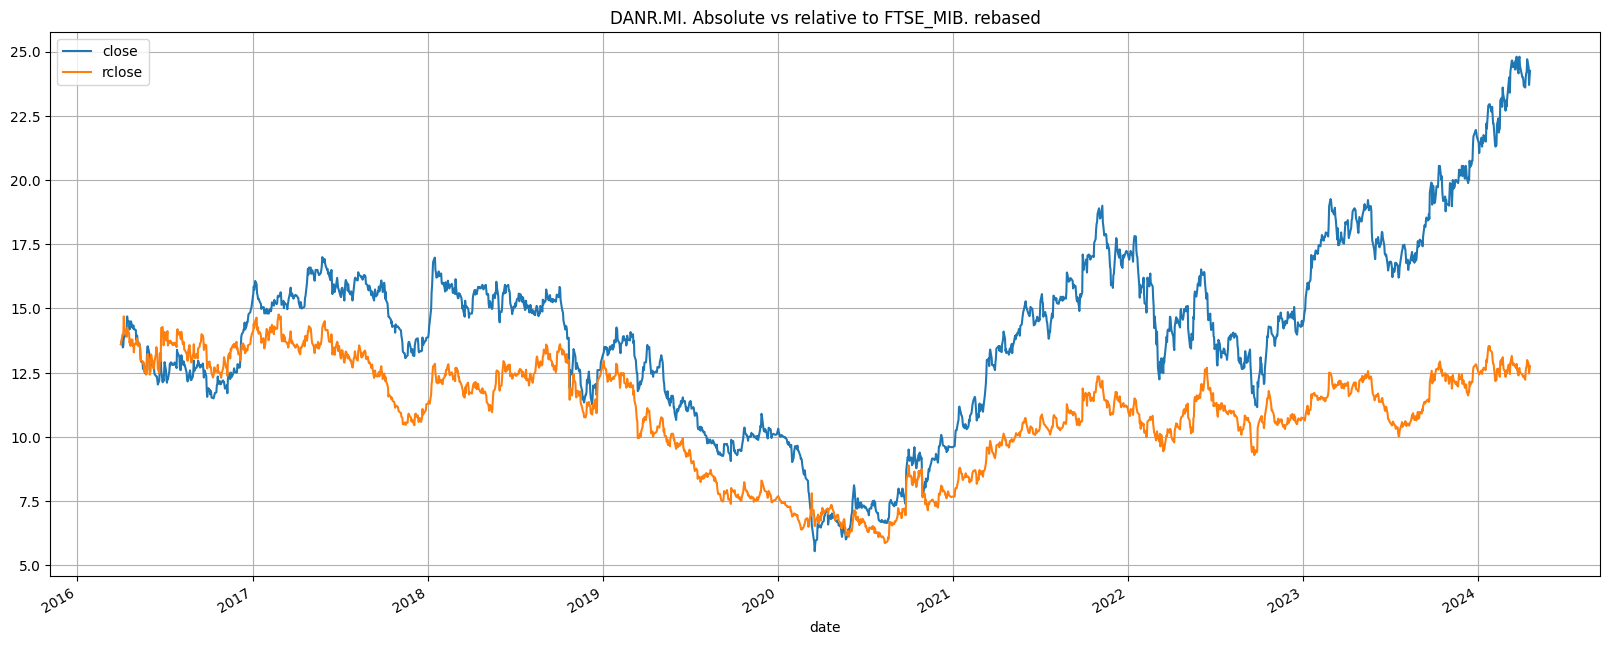

In [3]:
plot_abs_rel(df, ticker, bm_df, bm_name)

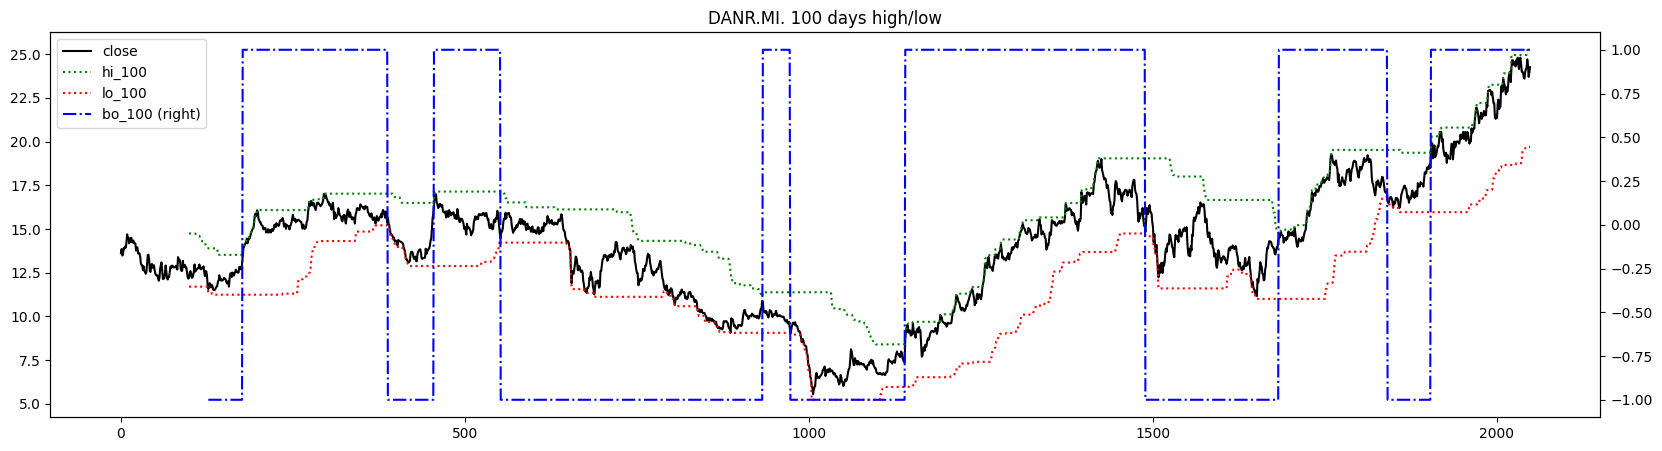

In [4]:
window_bo = 100
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

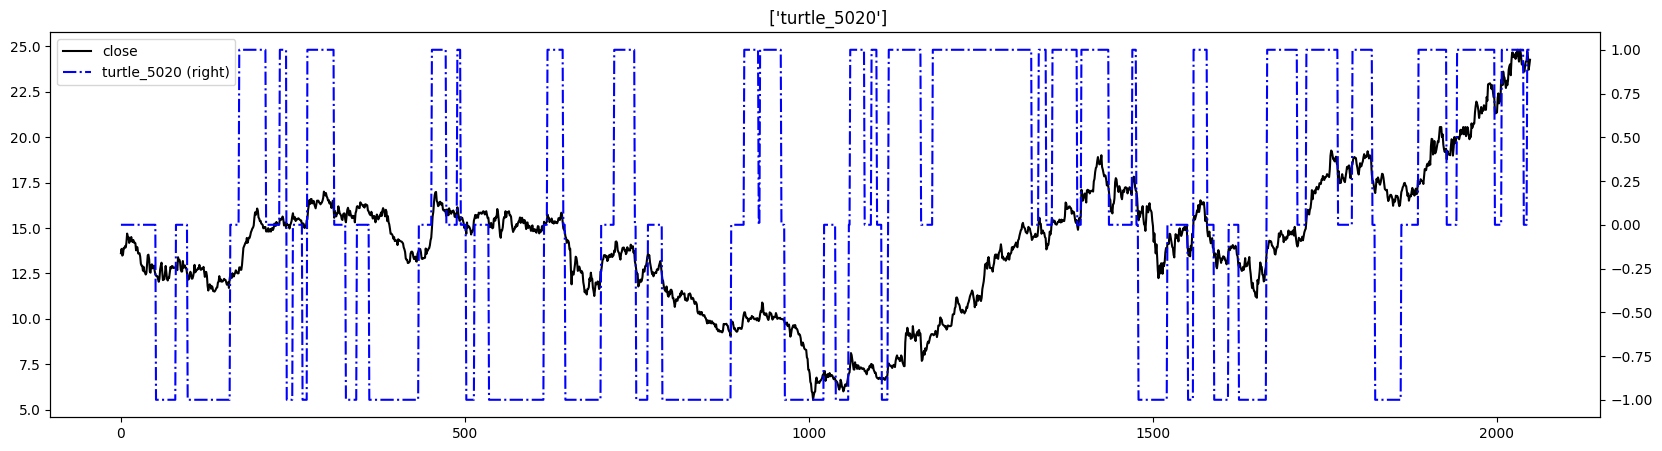

In [5]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

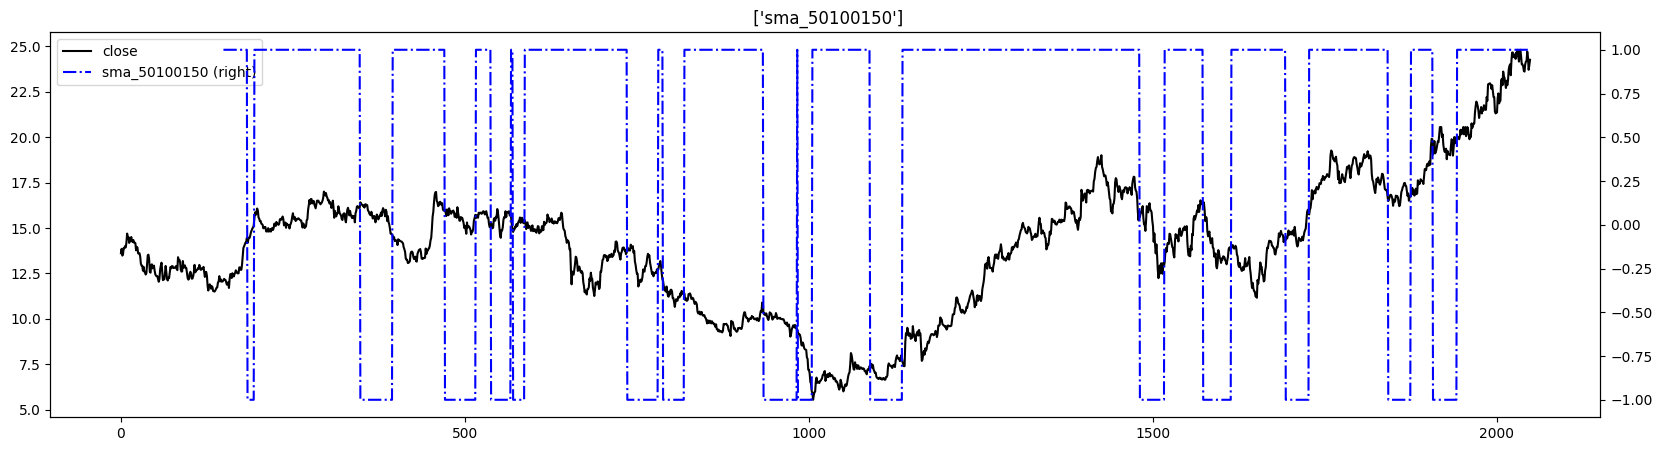

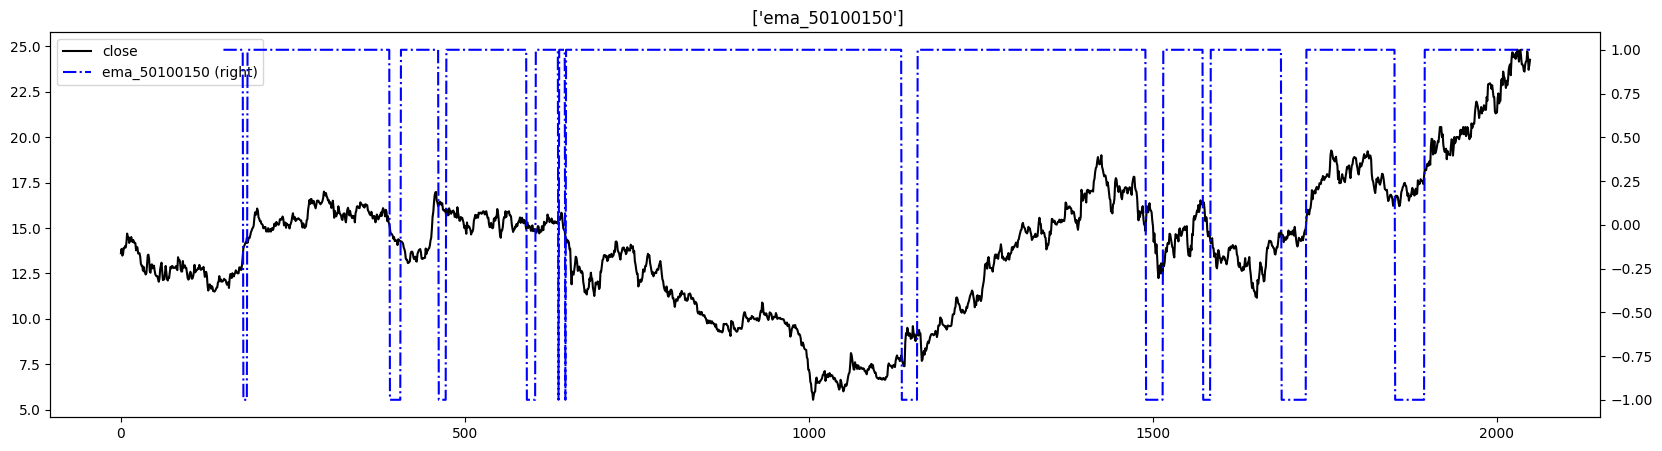

In [6]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

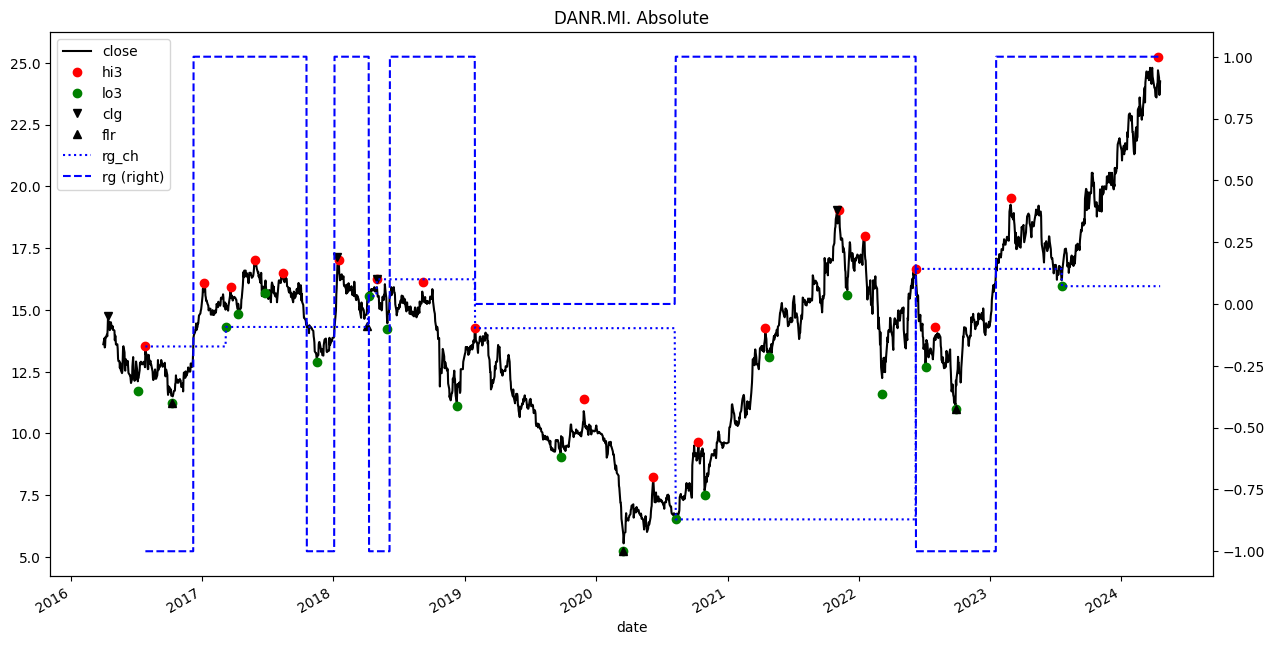

In [7]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

1
1


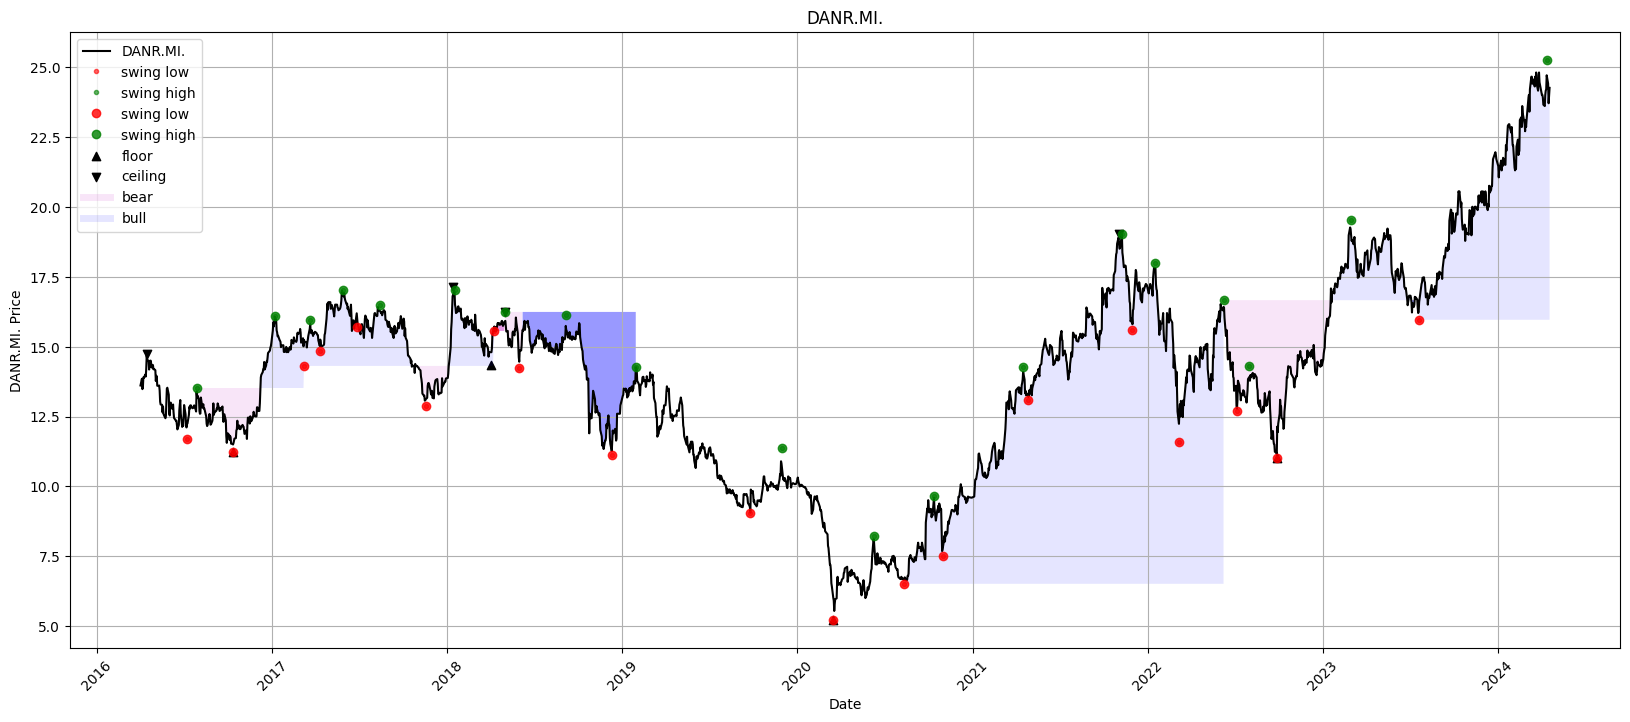

In [8]:
plot_regime_abs(df_fc, ticker)

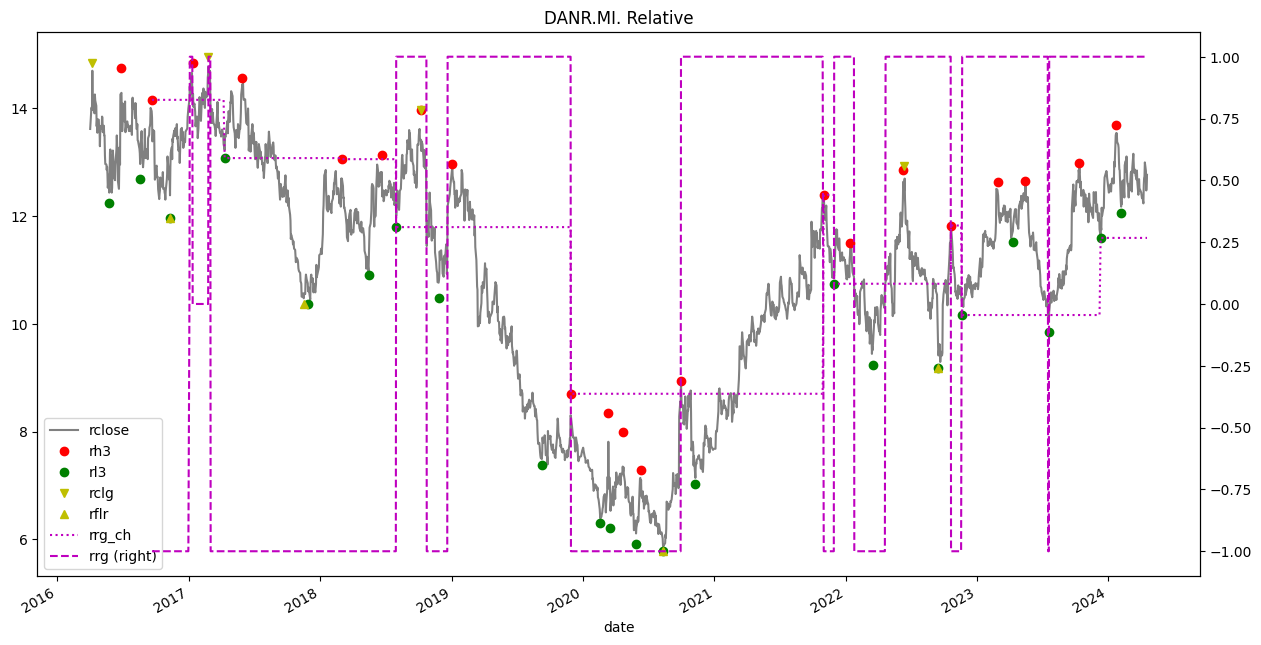

In [9]:
plot_signal_rel(df_fc, ticker)

1
1


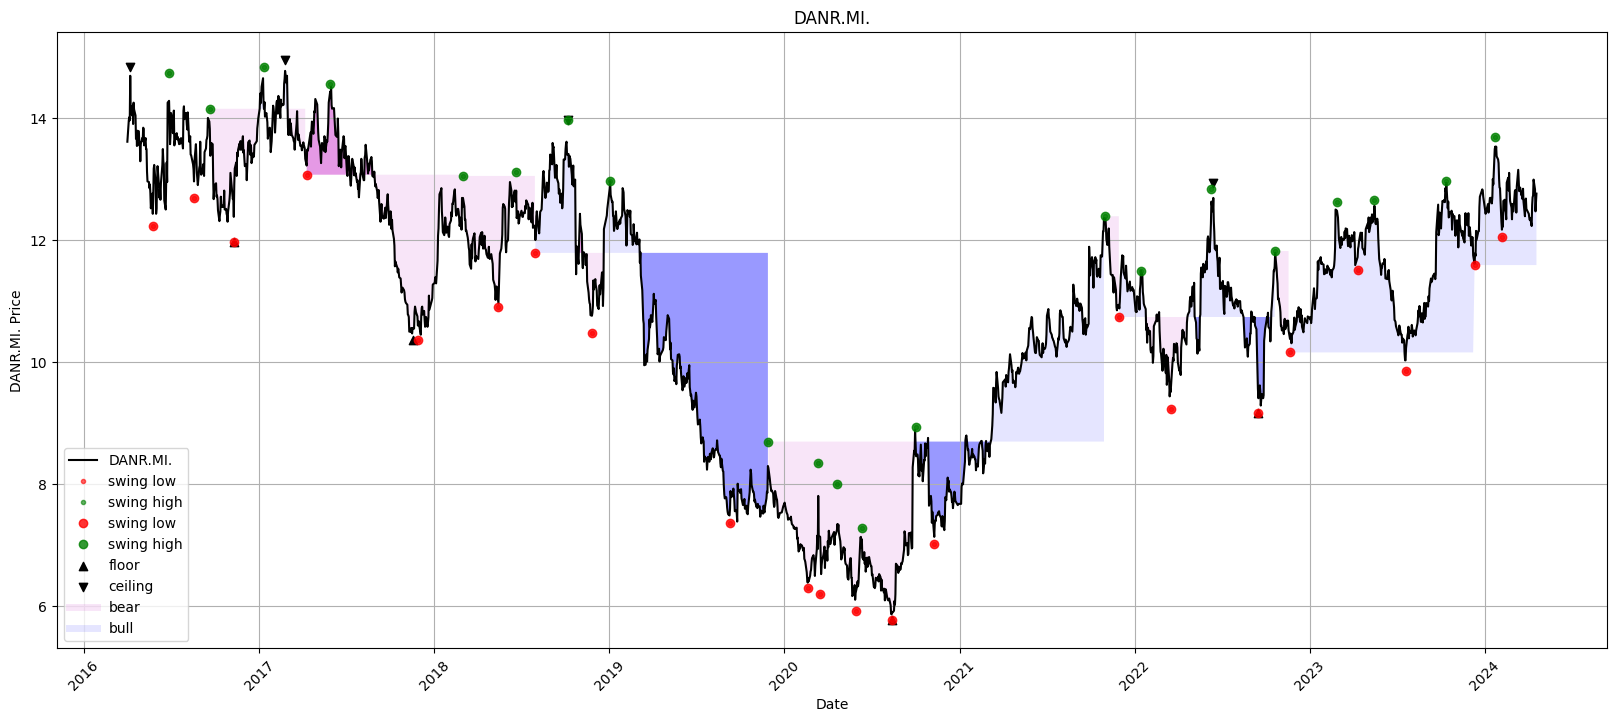

In [10]:
plot_regime_rel(df_fc, ticker)

In [11]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [12]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [13]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [14]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                            
breakout                24.25  23.299999  1.023335
ema                     24.25  23.299999  1.469463
floor_ceiling           24.25  23.300000  2.273733
floor_ceiling_relative  24.25  23.300000  1.219895
sma                     24.25  23.299999  9.447524
turtle                  24.25  23.299999  0.826061

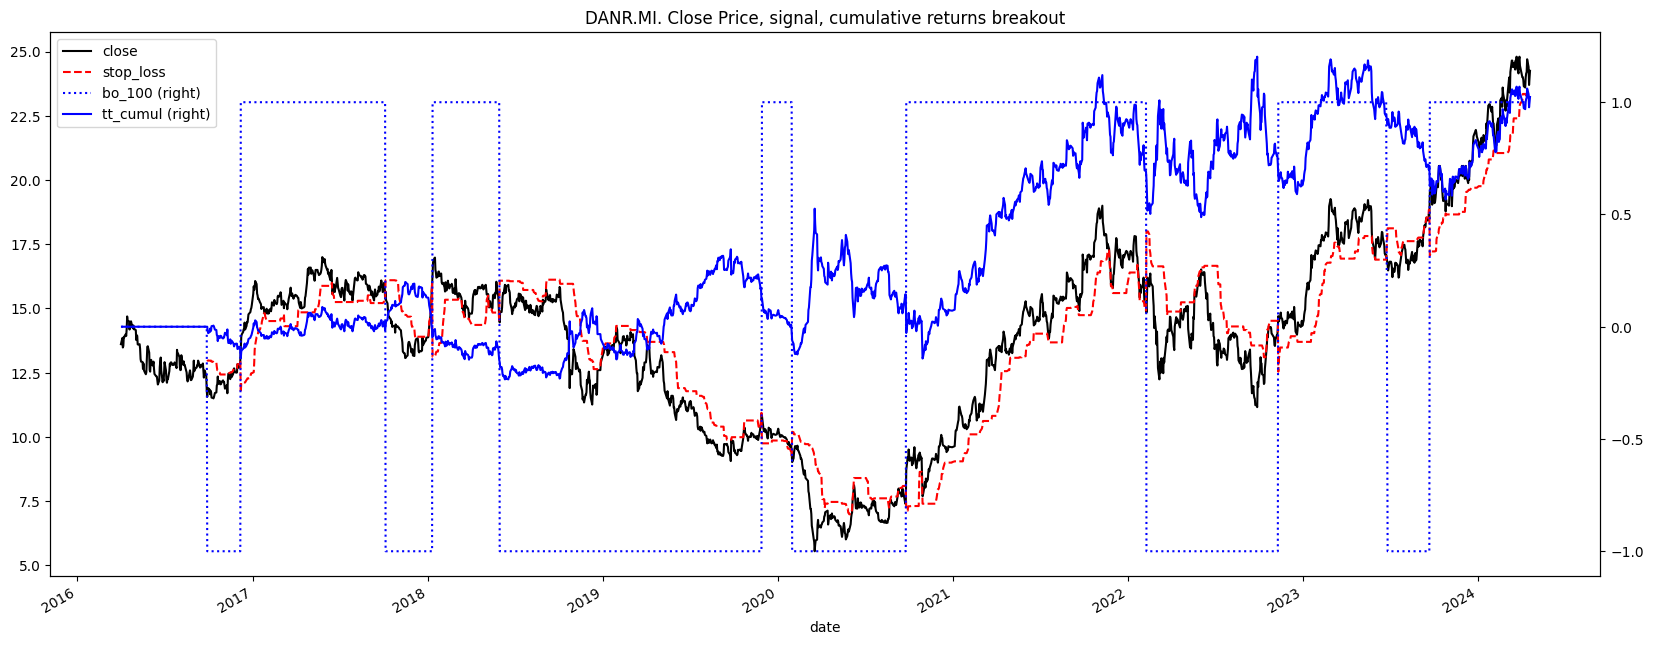

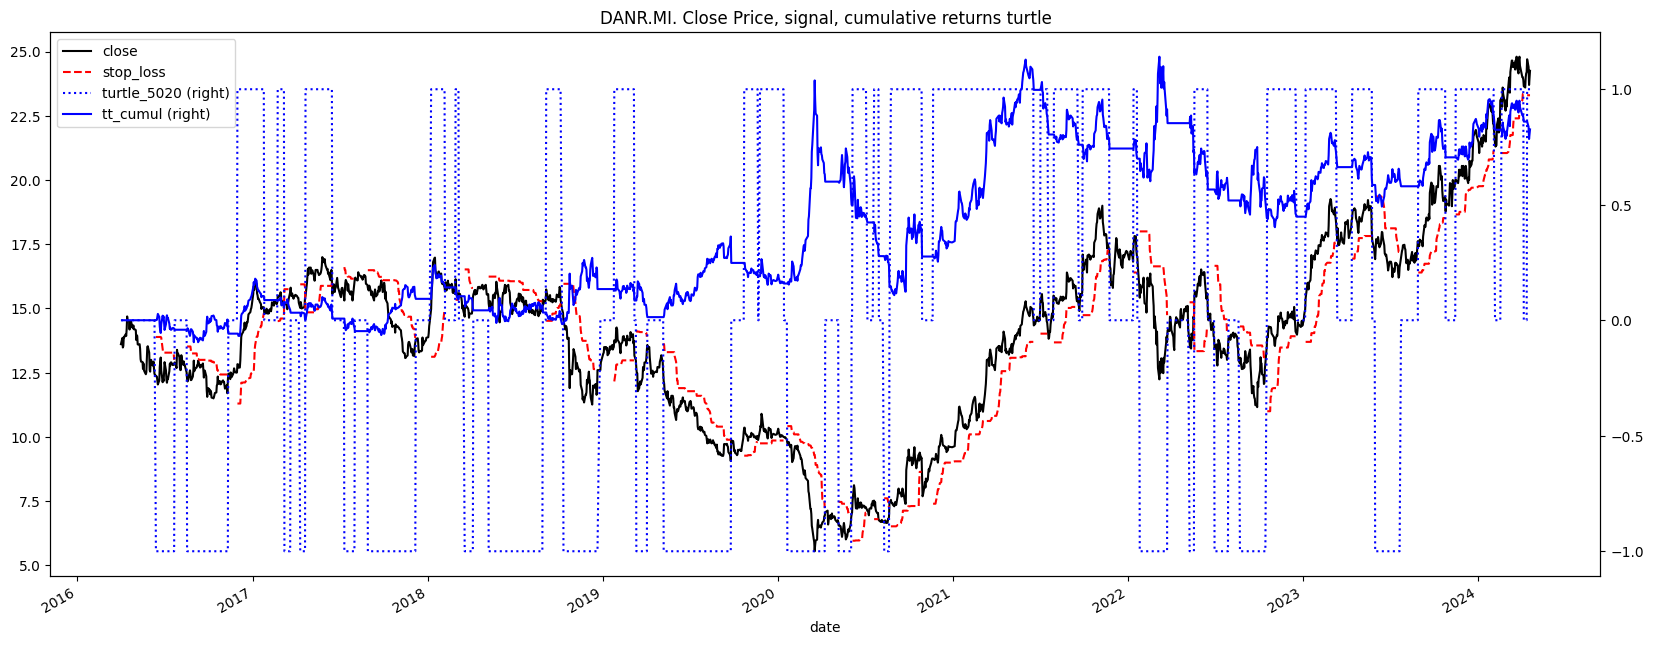

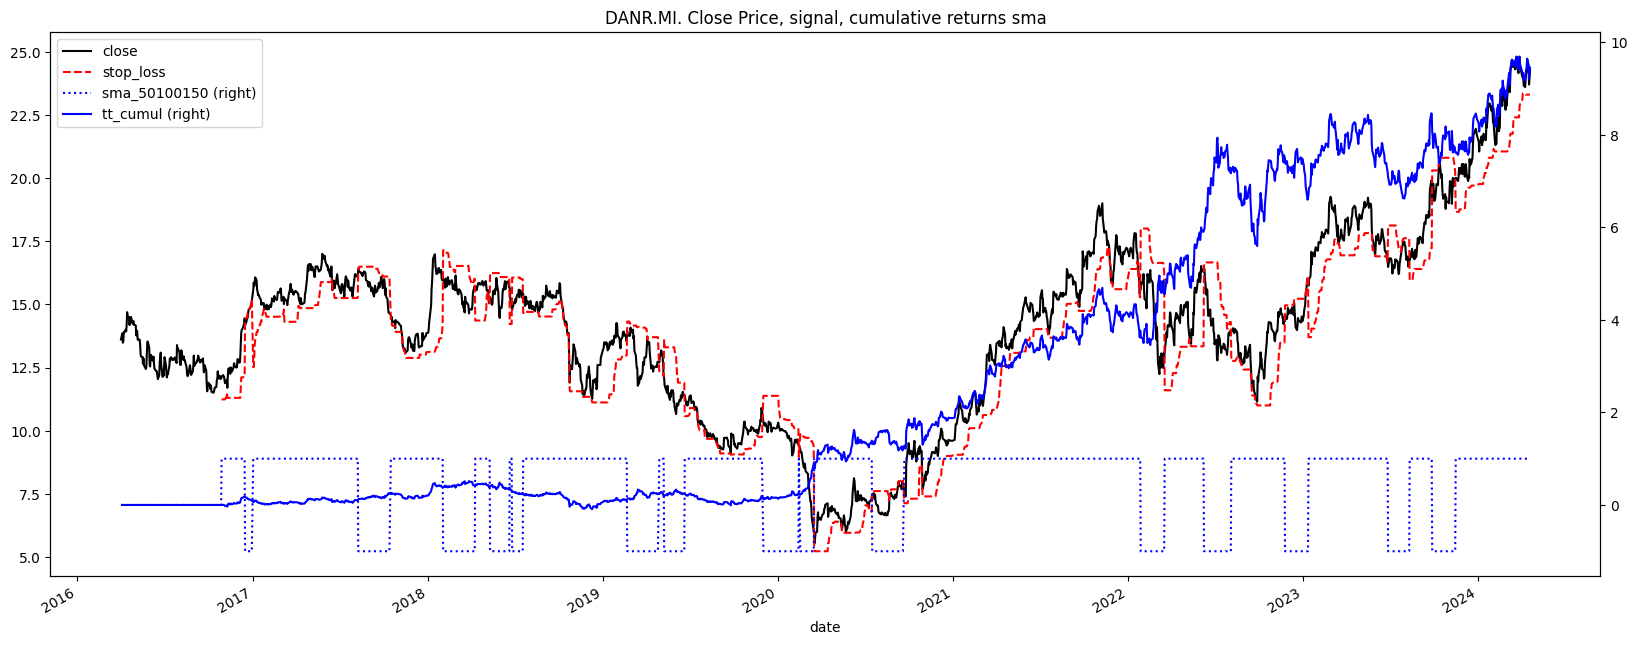

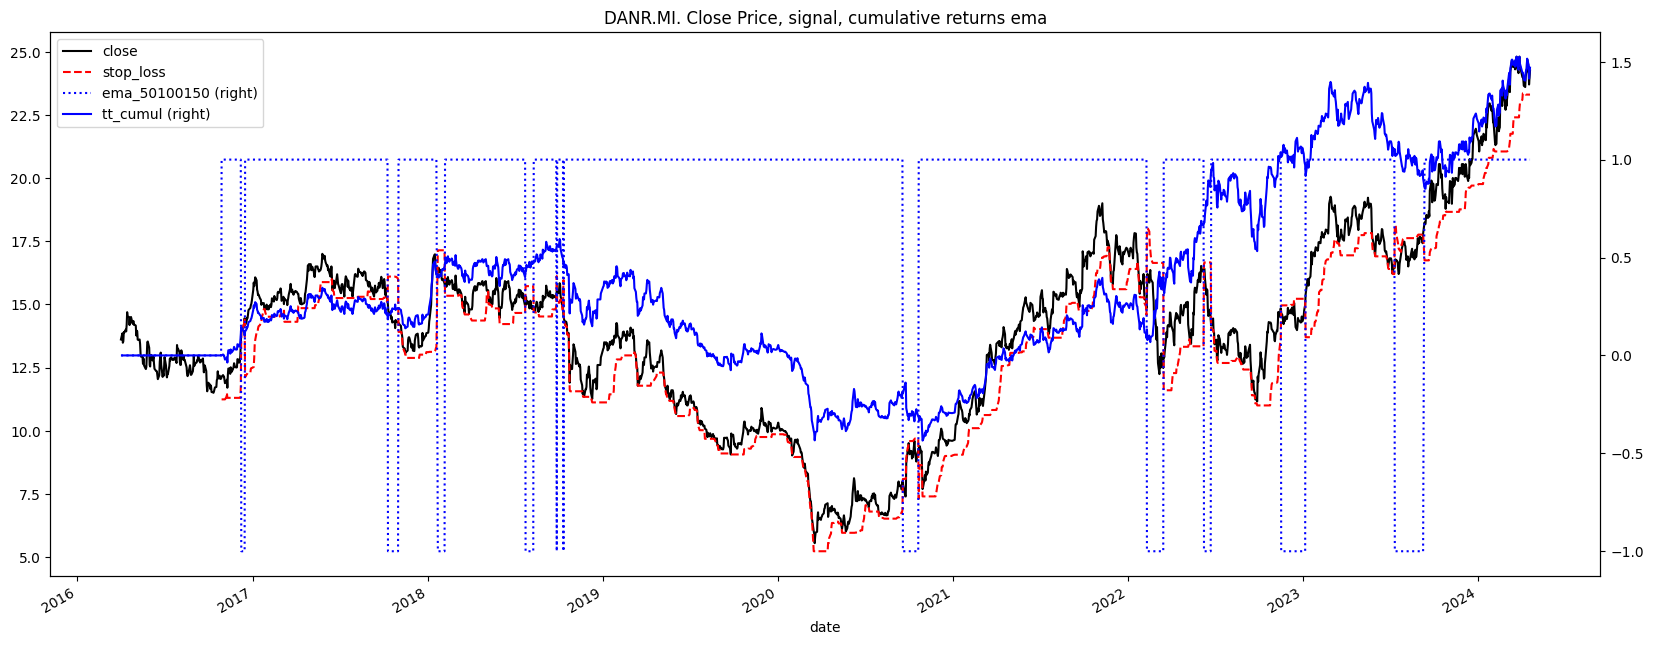

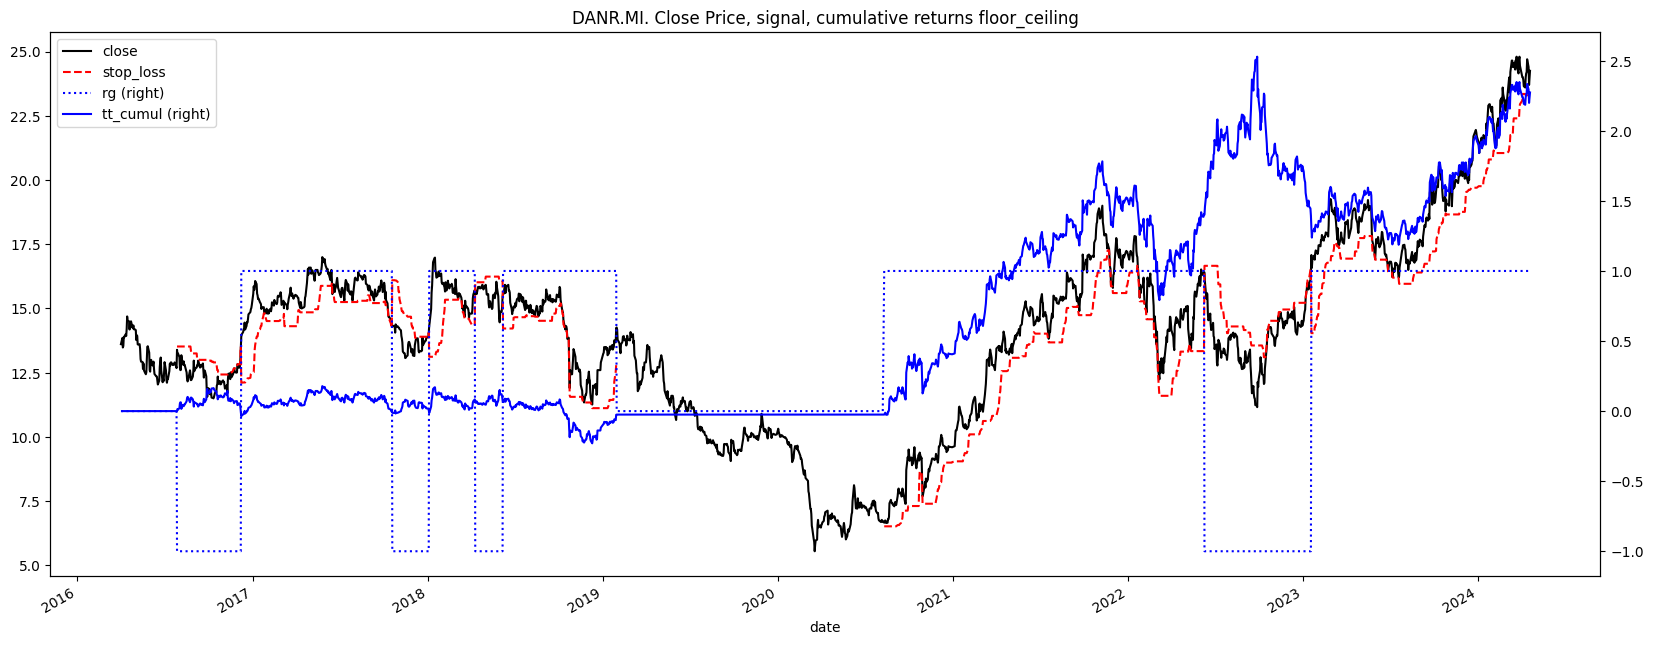

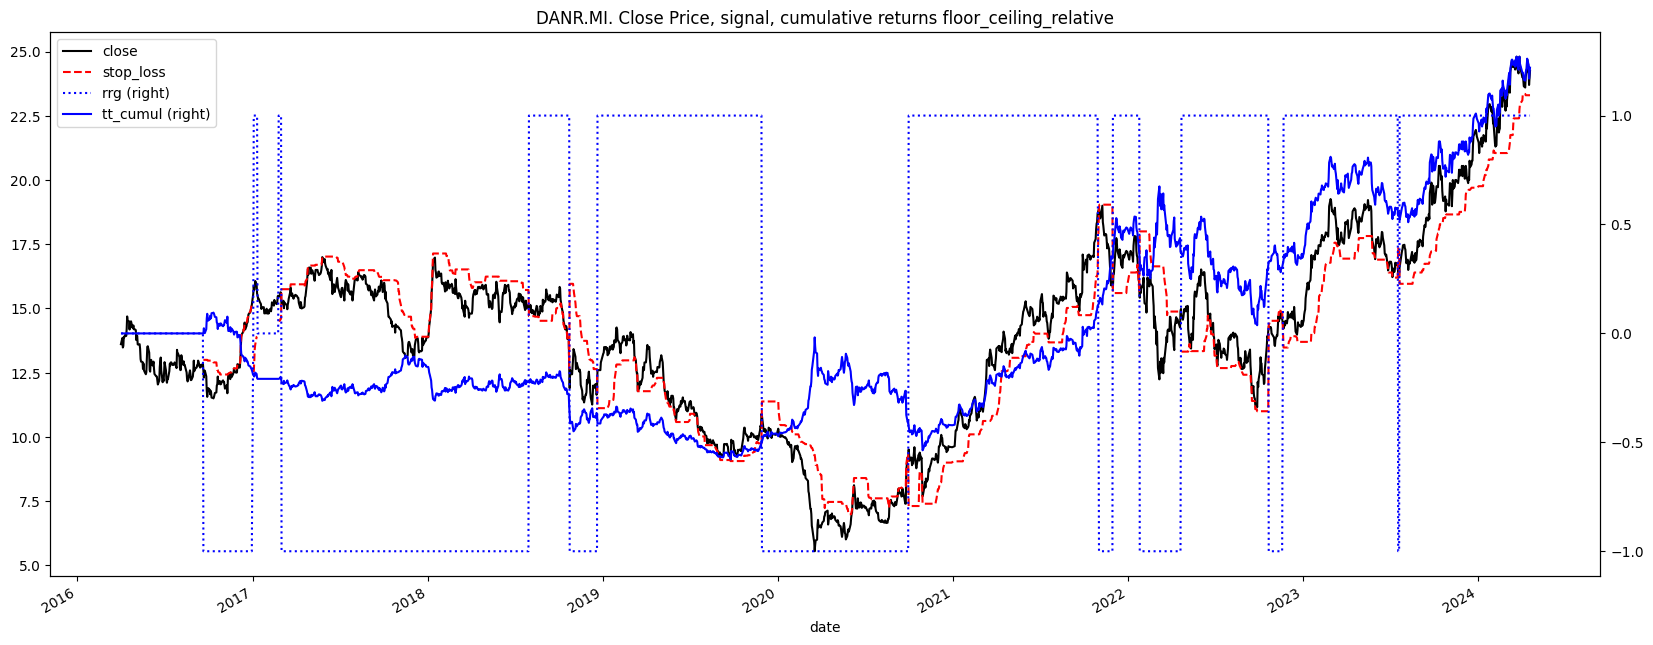

In [15]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

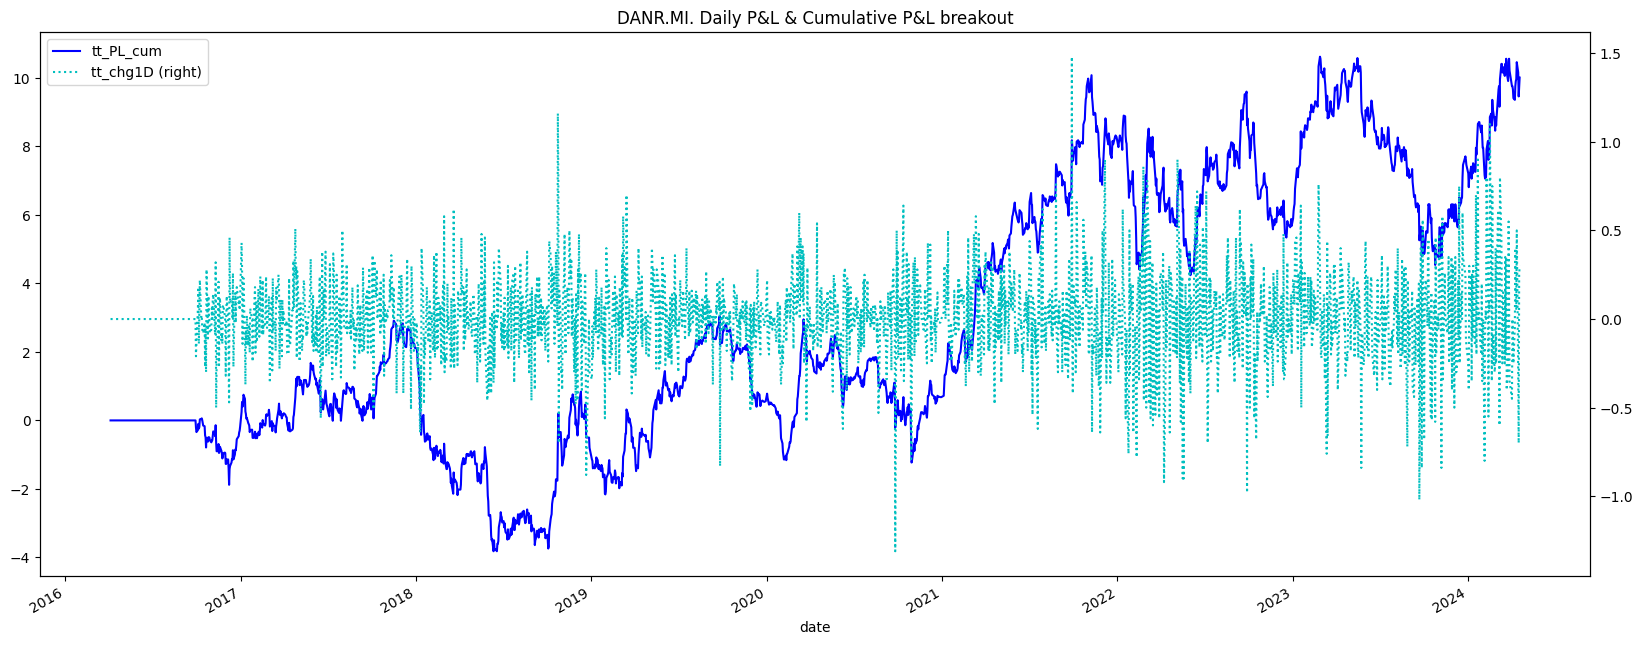

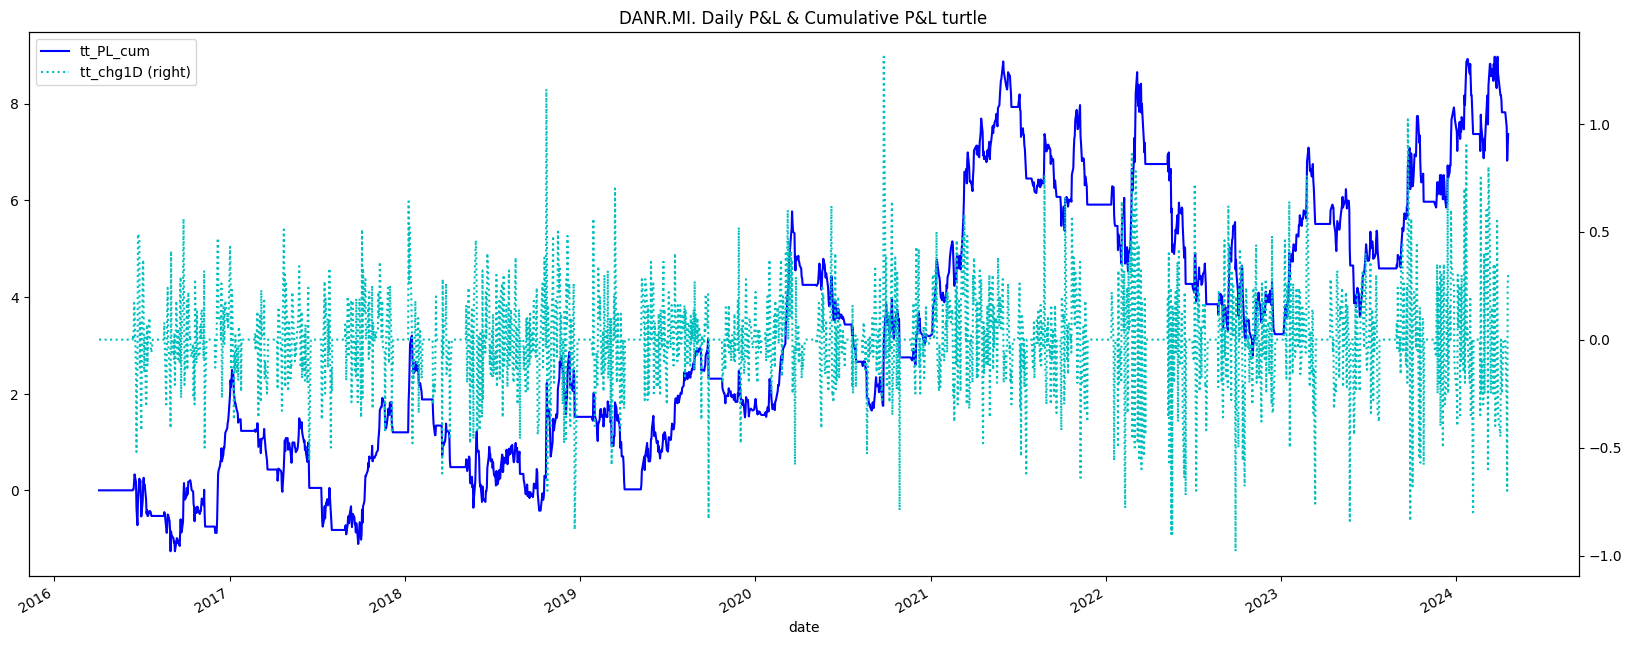

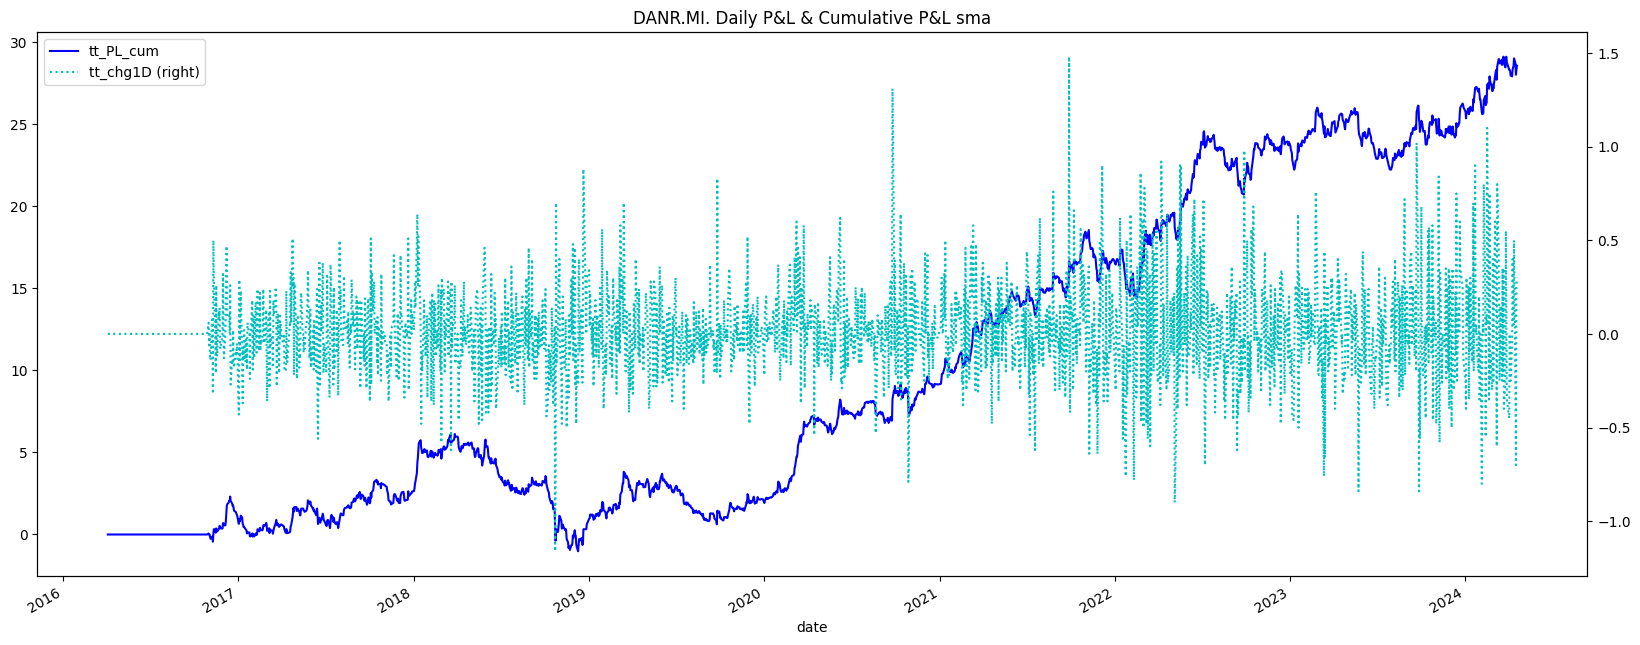

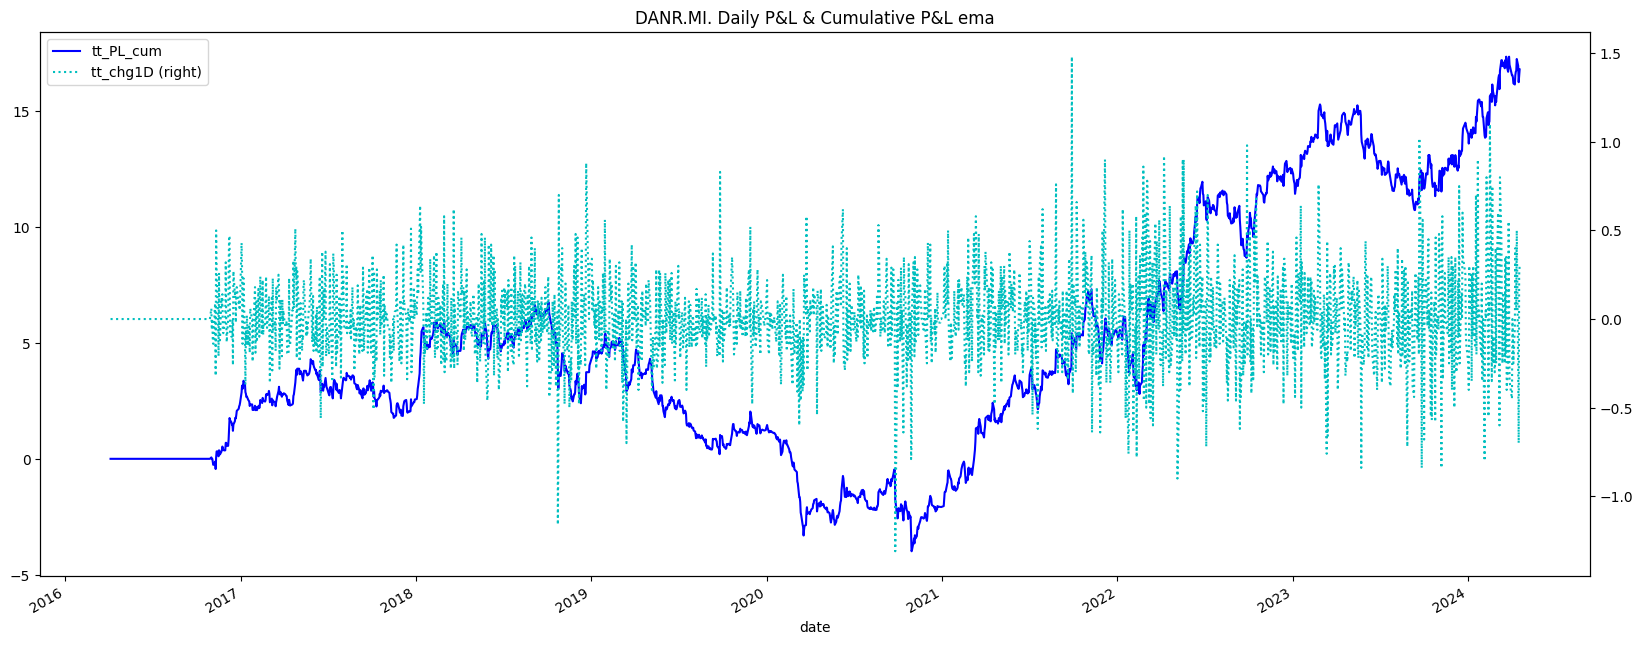

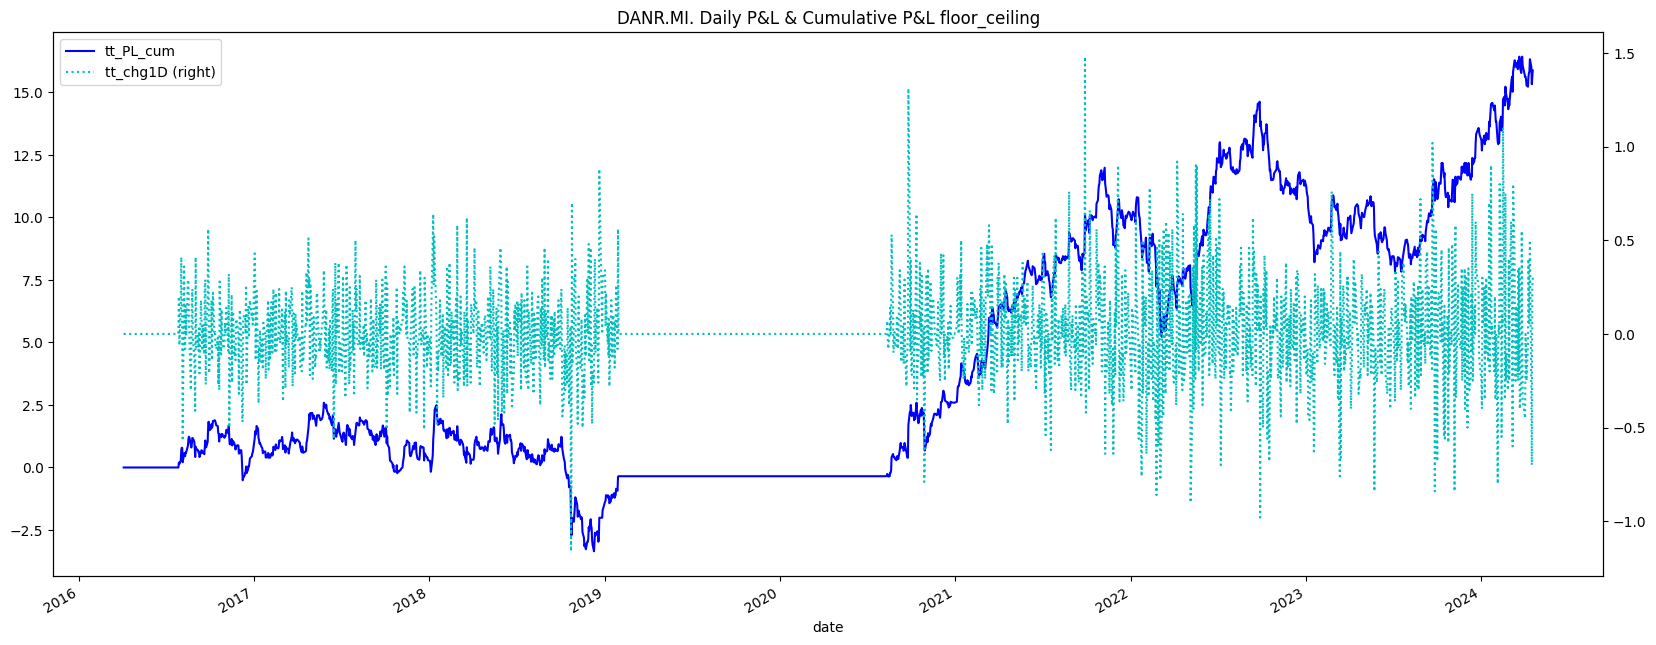

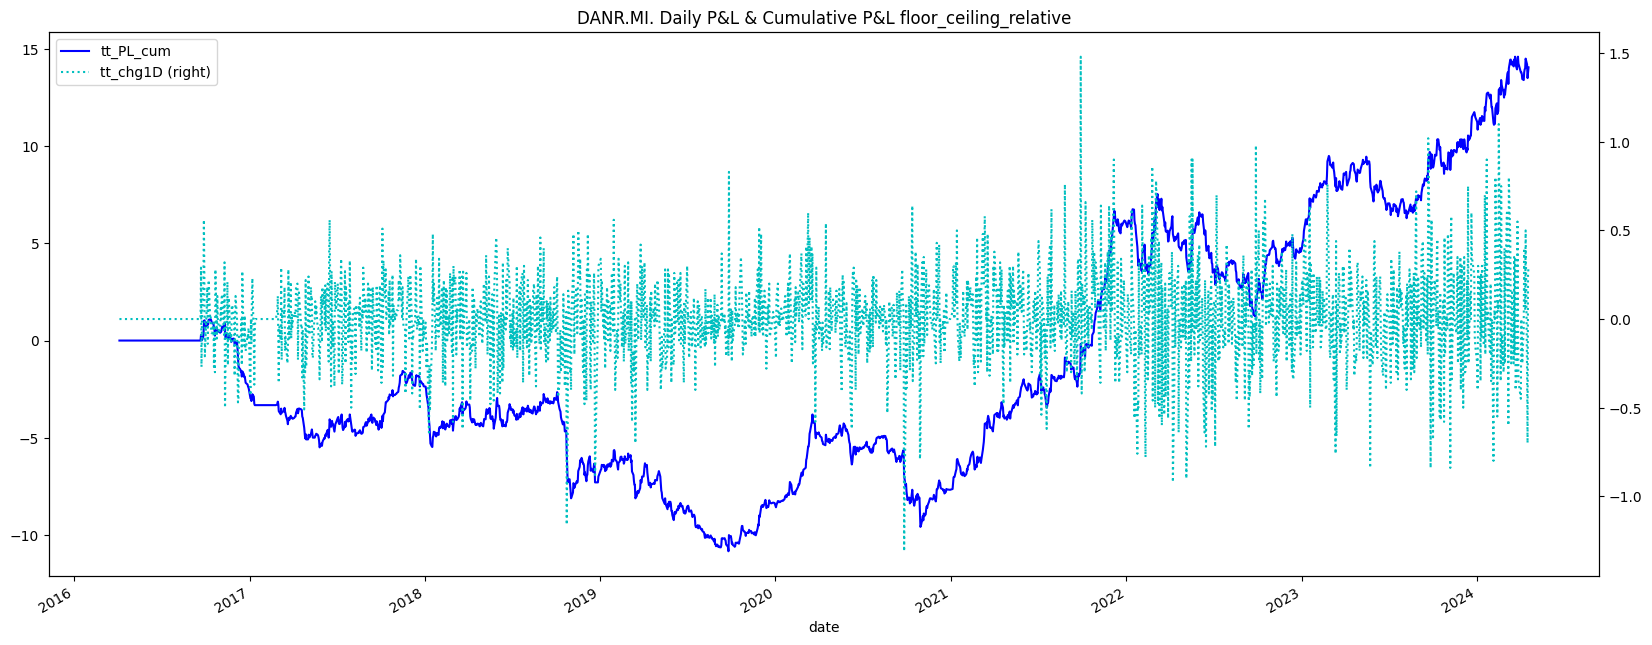

In [16]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [17]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy      kelly
method                                                               
breakout                    0.001801              0.001782  47.138143
ema                         0.001801              0.001782  47.138143
floor_ceiling               0.001801              0.001782  47.138139
floor_ceiling_relative      0.001801              0.001782  47.138139
sma                         0.001801              0.001782  47.138143
turtle                      0.001368              0.001354  48.613602

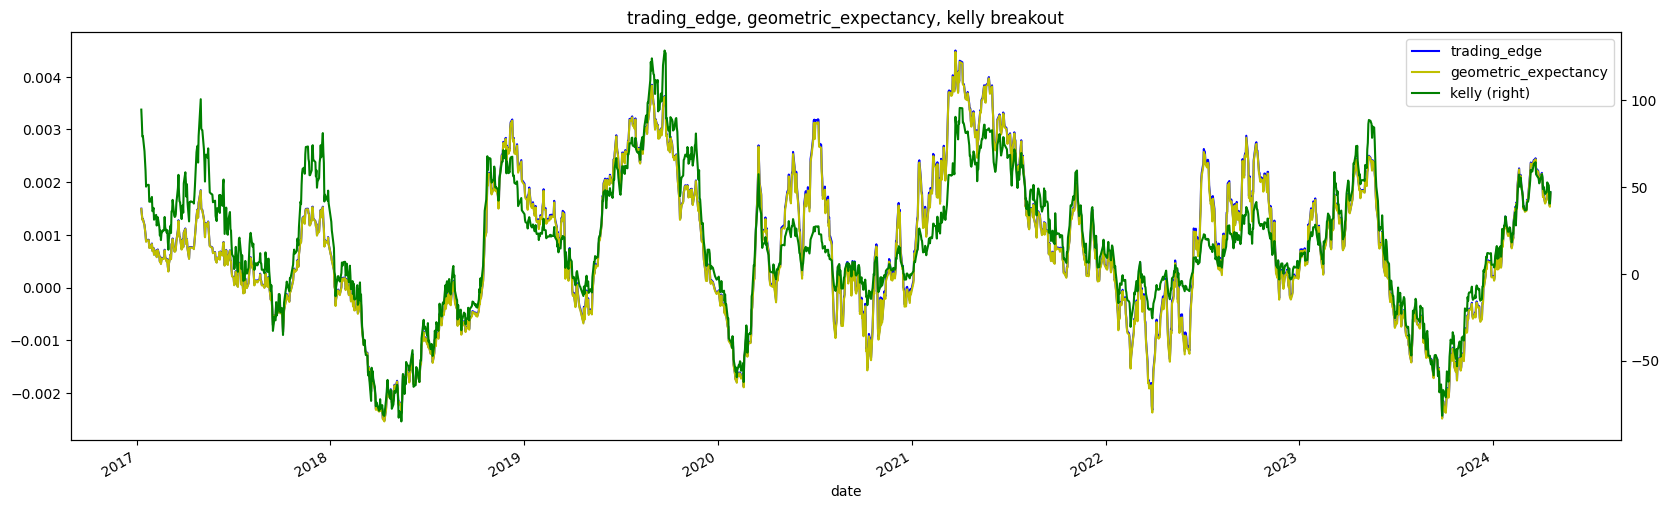

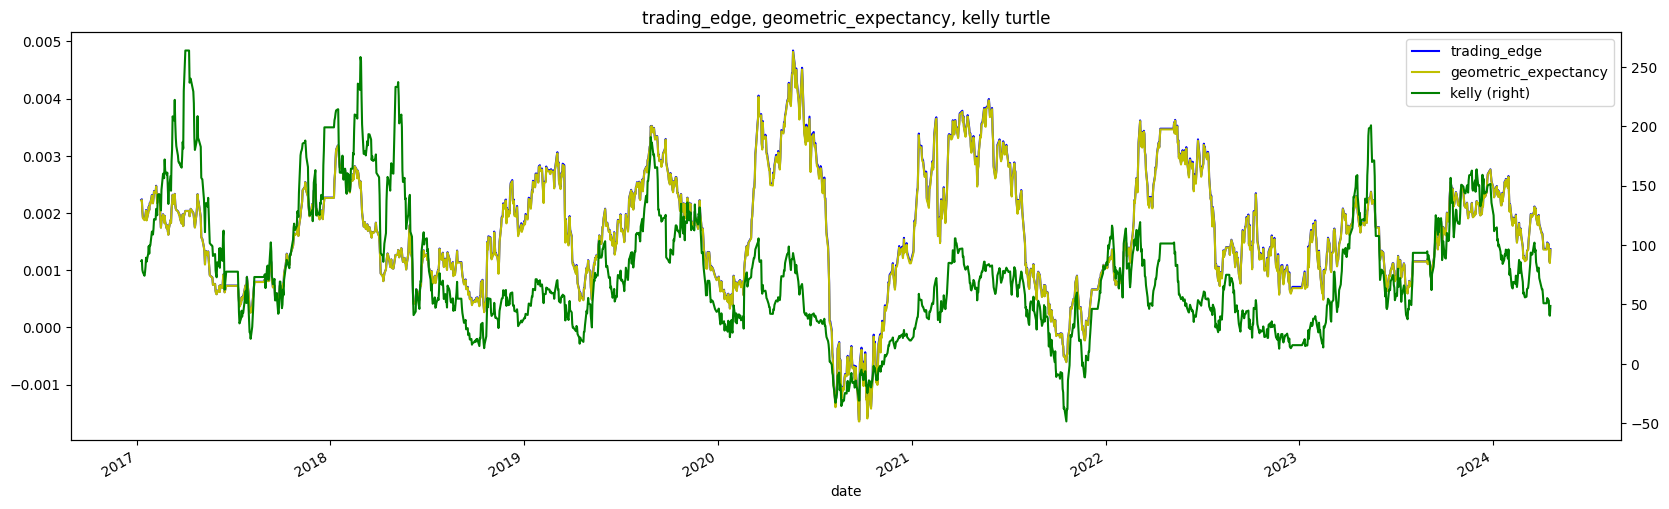

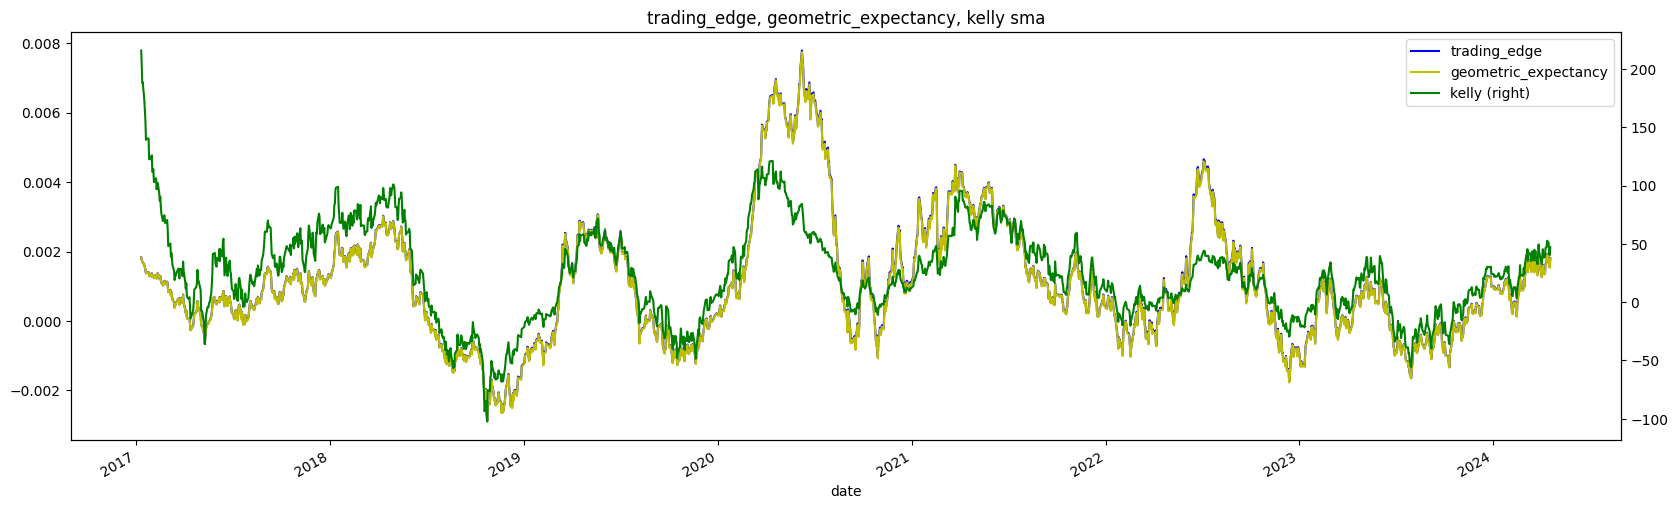

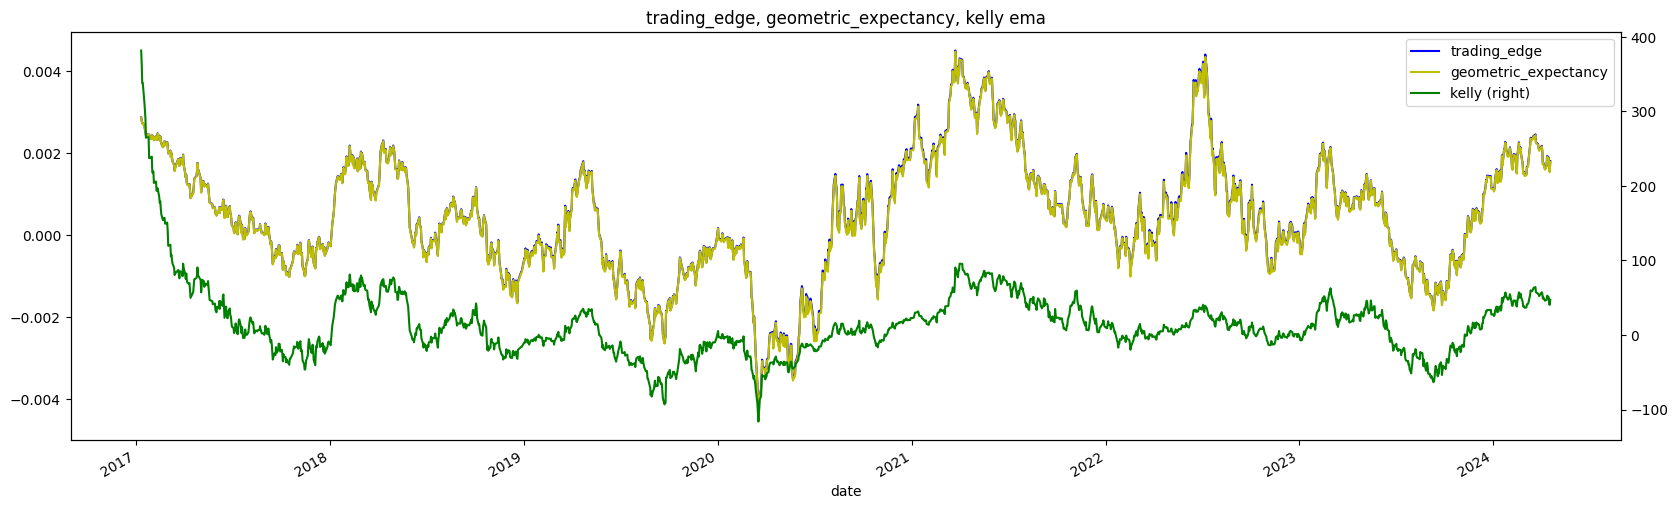

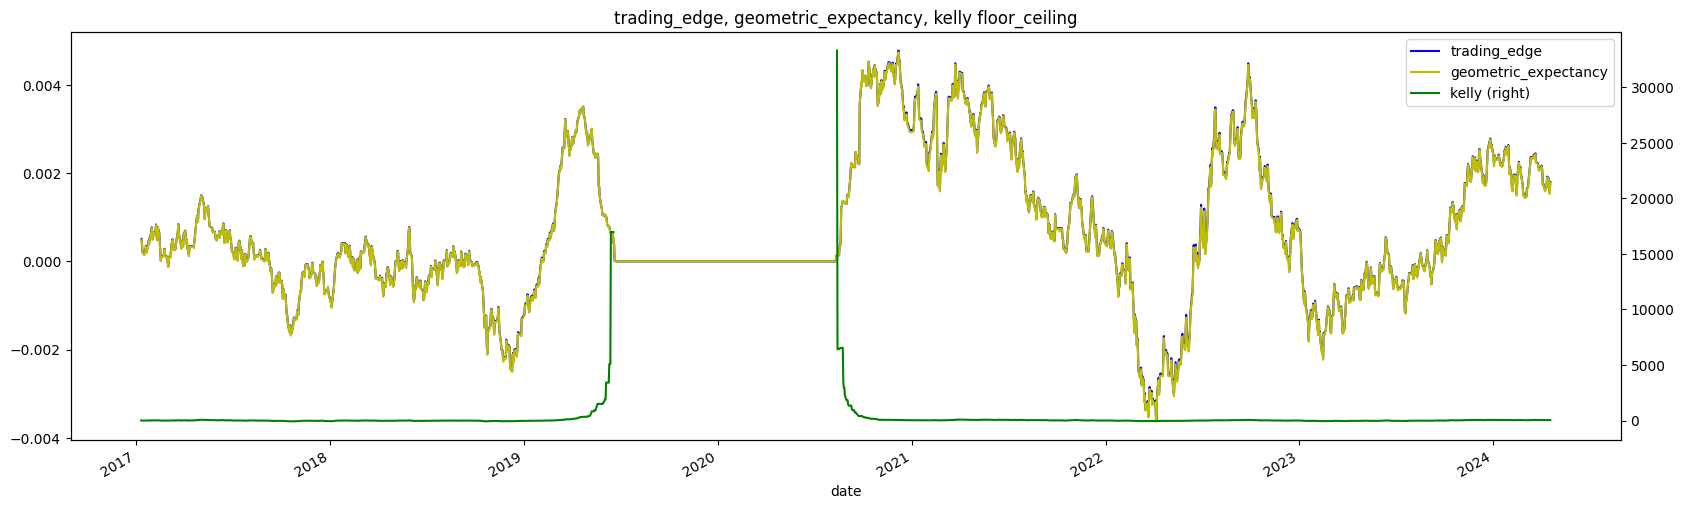

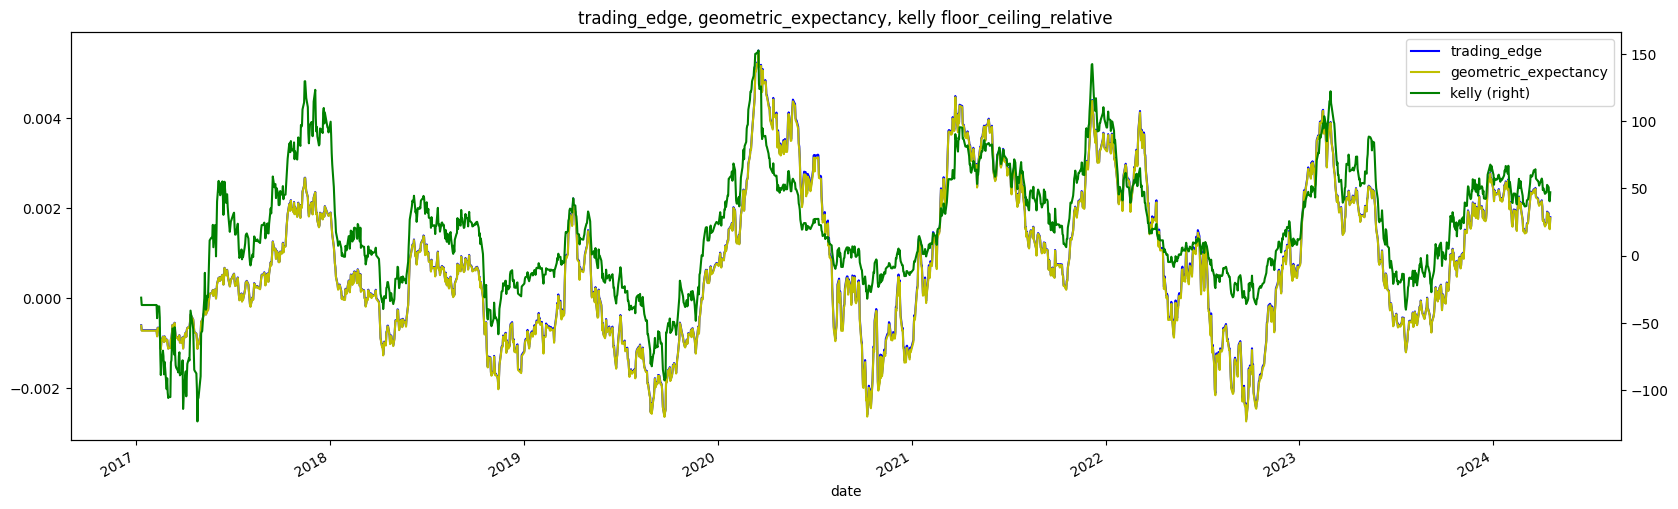

In [18]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [19]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [20]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [21]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [22]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant      concave       convex  equal_weight  \
method                                                                        
breakout                 95995.9992   93993.9988   93993.9988   104004.0008   
ema                     108405.0000  113448.0000  113448.0000   106724.0000   
floor_ceiling           159793.0000  131244.0000  131244.0000   111256.0000   
floor_ceiling_relative  110656.0000  116686.0000  115761.0000   104212.0000   
sma                     114275.0010  122840.0016  122840.0016   111420.0008   
turtle                   98142.0000   97694.0000   97435.0002   103146.0000   

                        tt_PL_cum_fx  
method                                
breakout                   10.010002  
ema                        16.810000  
floor_ceiling              15.880000  
floor_ceiling_relative     14.040000  
sma                        28.550002  
turtle                      7.369999

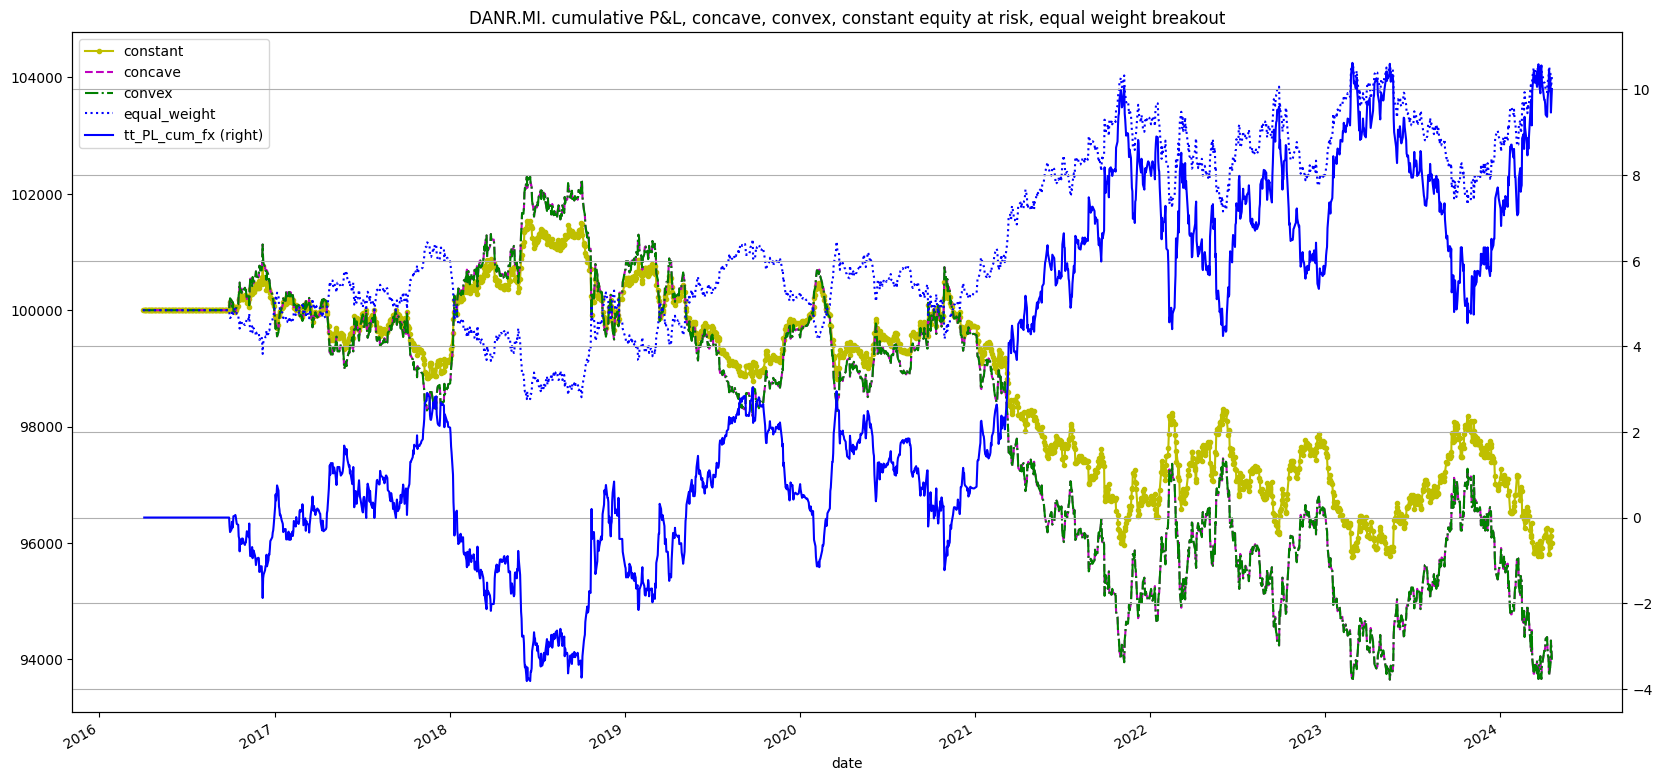

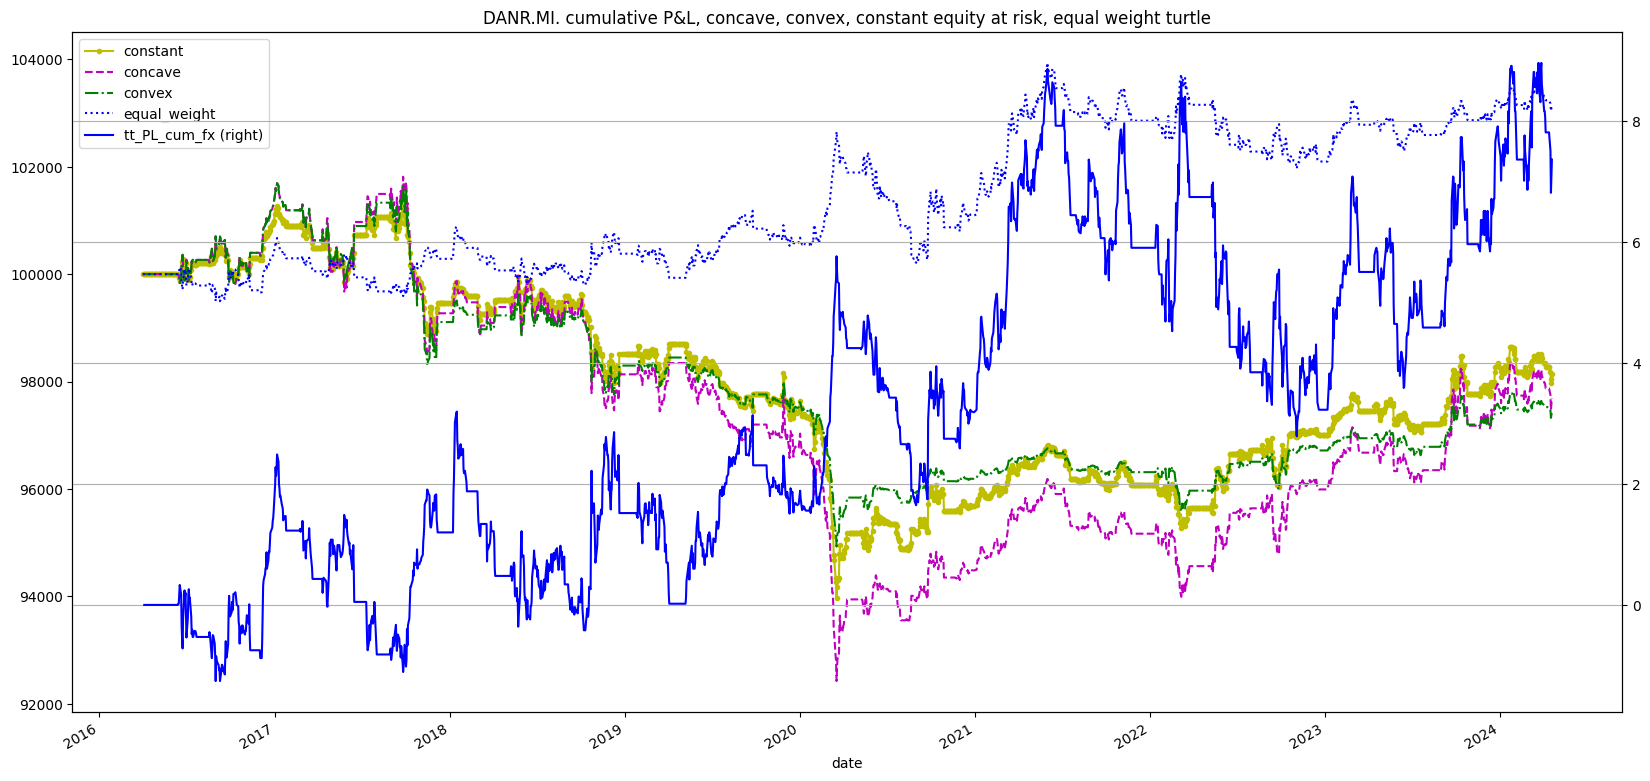

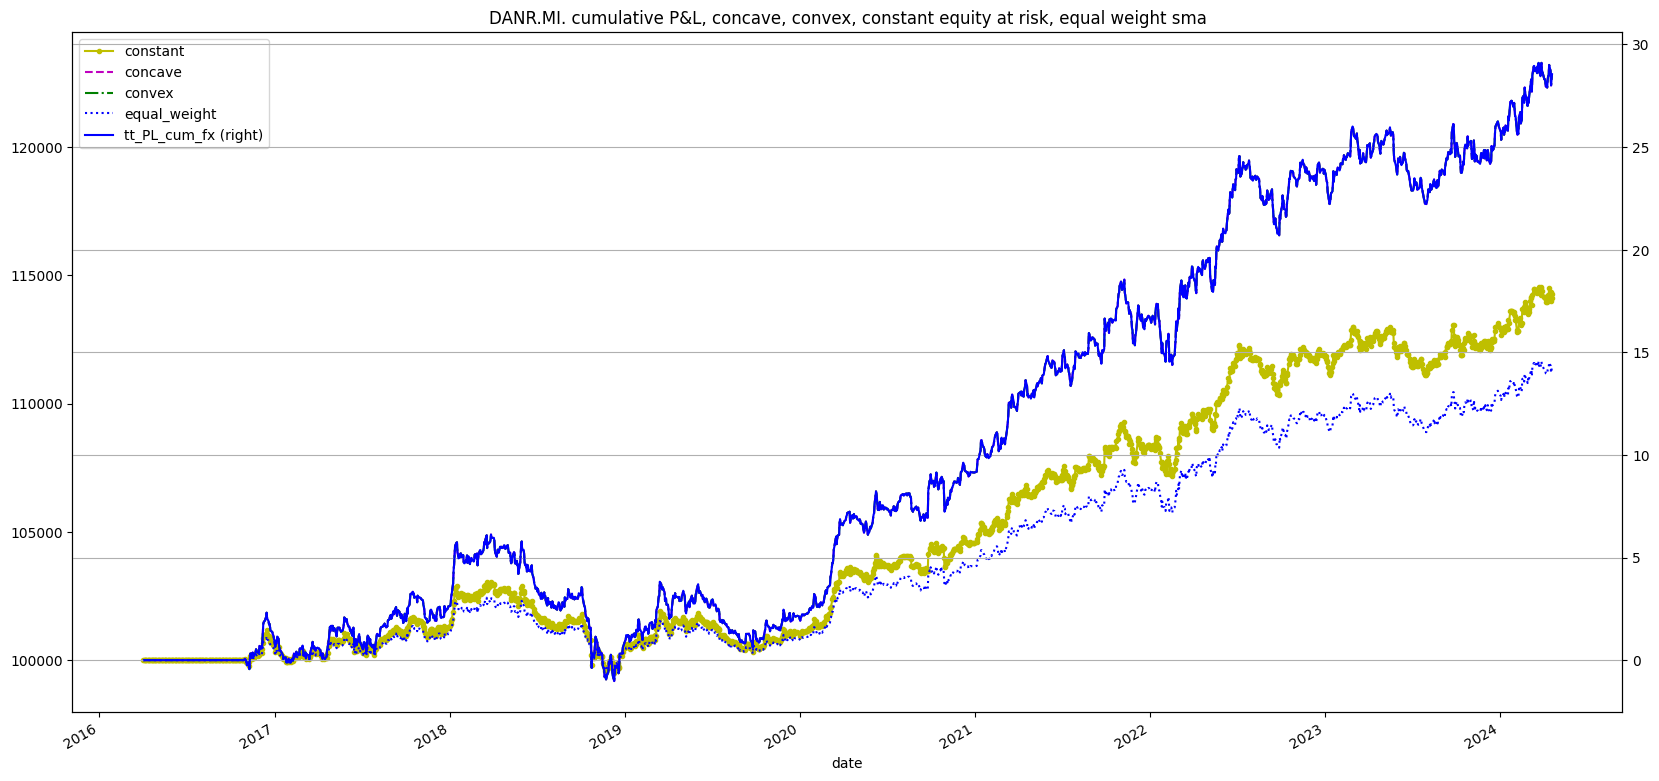

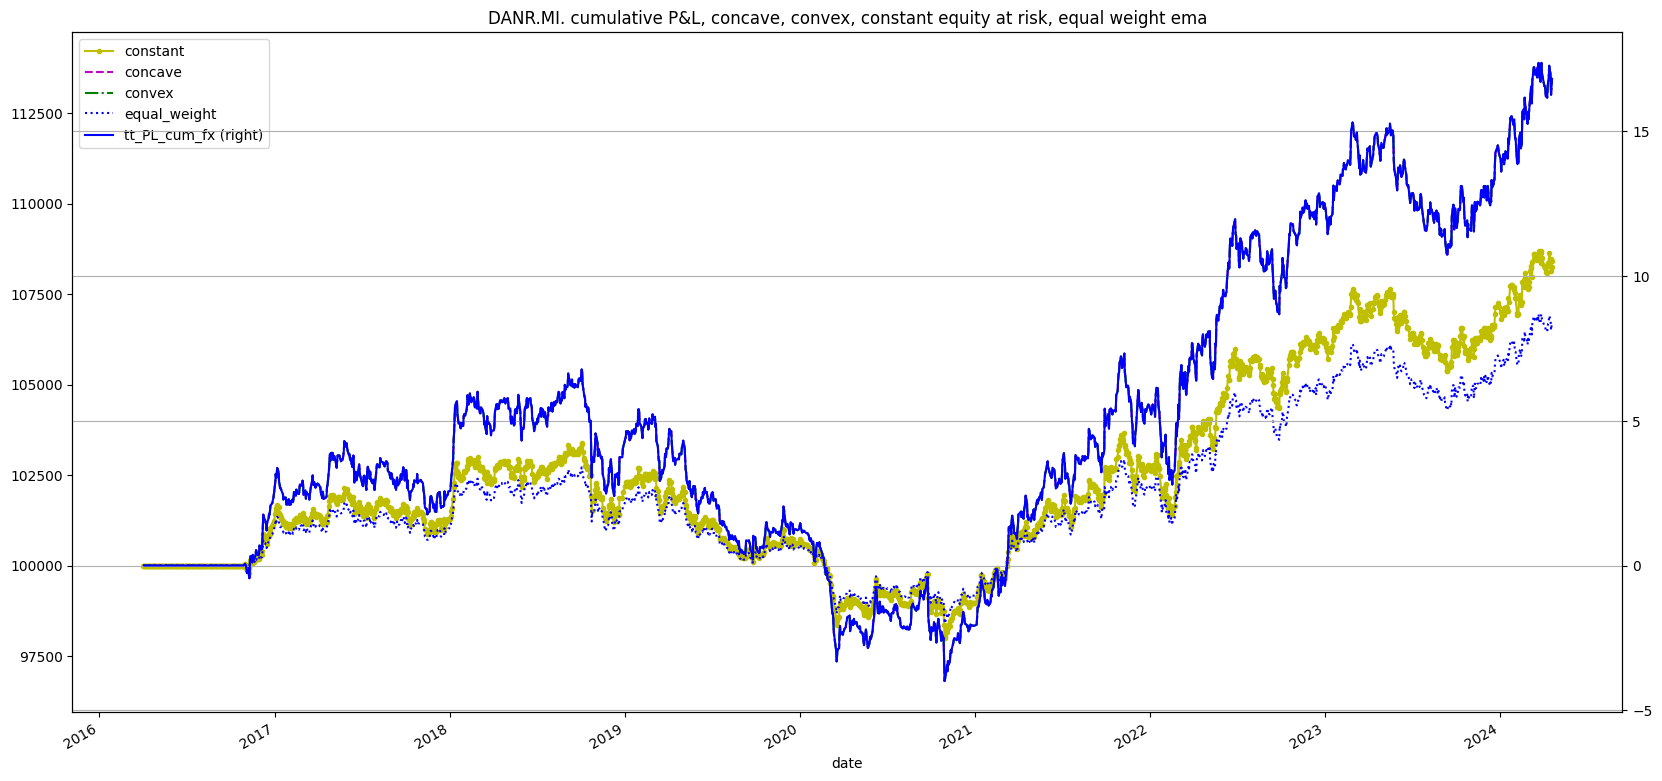

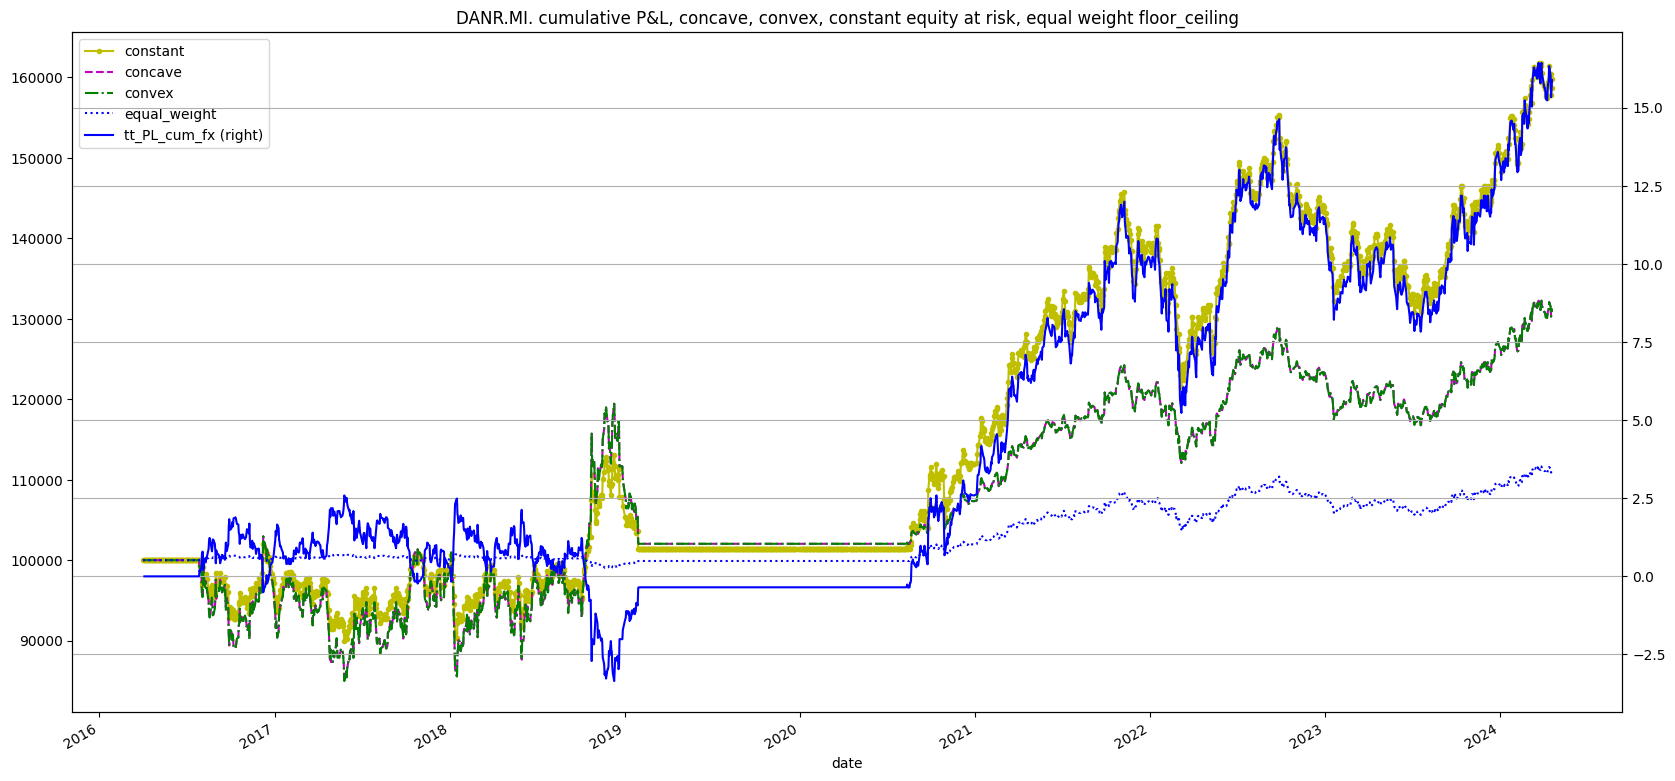

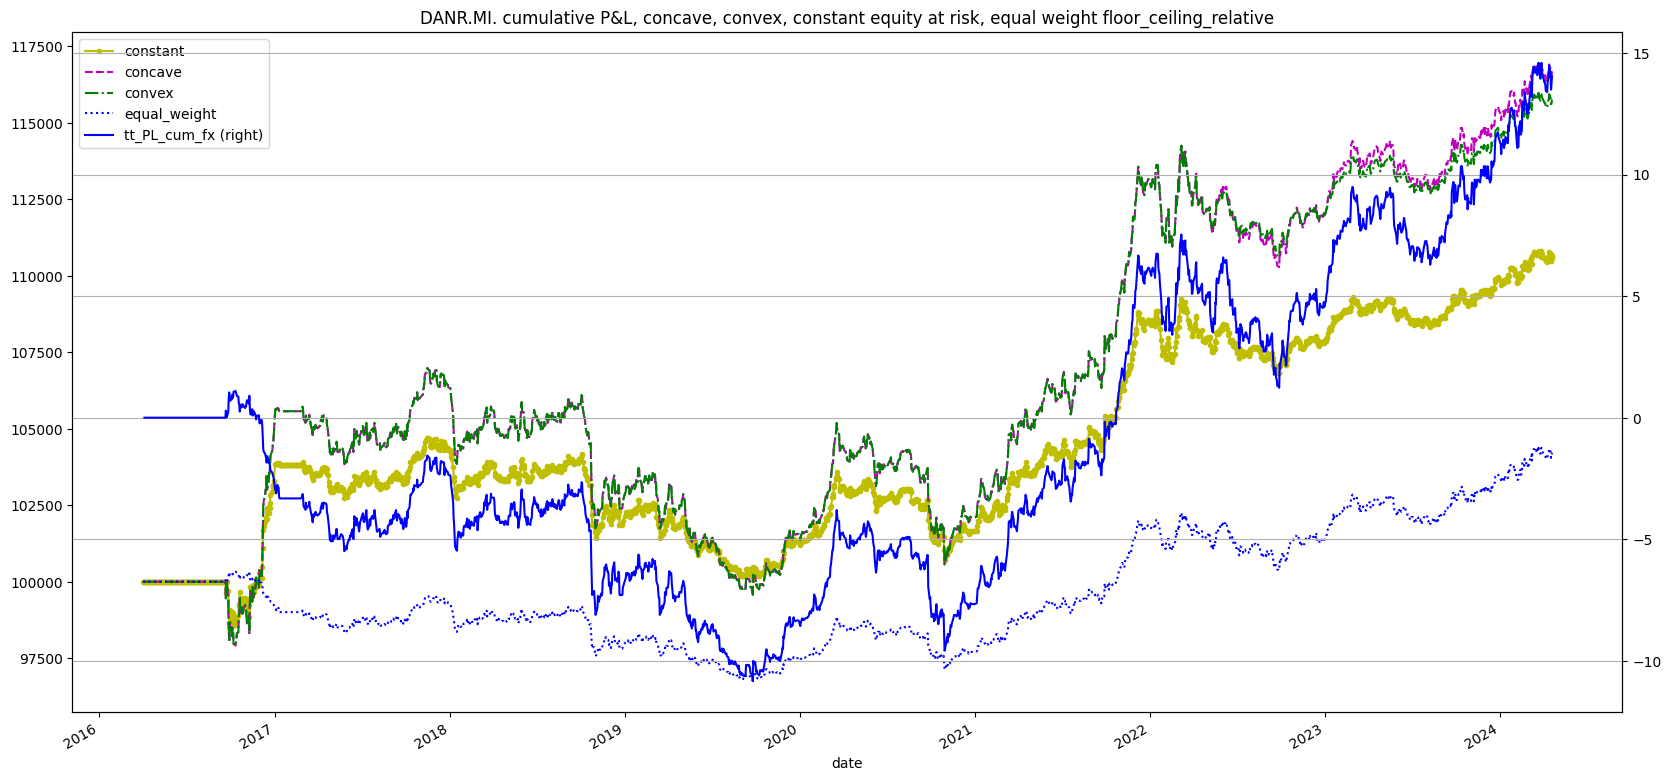

In [23]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [24]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                 -200.0   -400.0   -600.0   -600.0
ema                      -200.0    500.0    800.0    800.0
floor_ceiling            -200.0   3600.0   1800.0   1800.0
floor_ceiling_relative   -200.0    300.0    500.0    400.0
sma                      -200.0    500.0    800.0    800.0
turtle                   -200.0    300.0    400.0    200.0

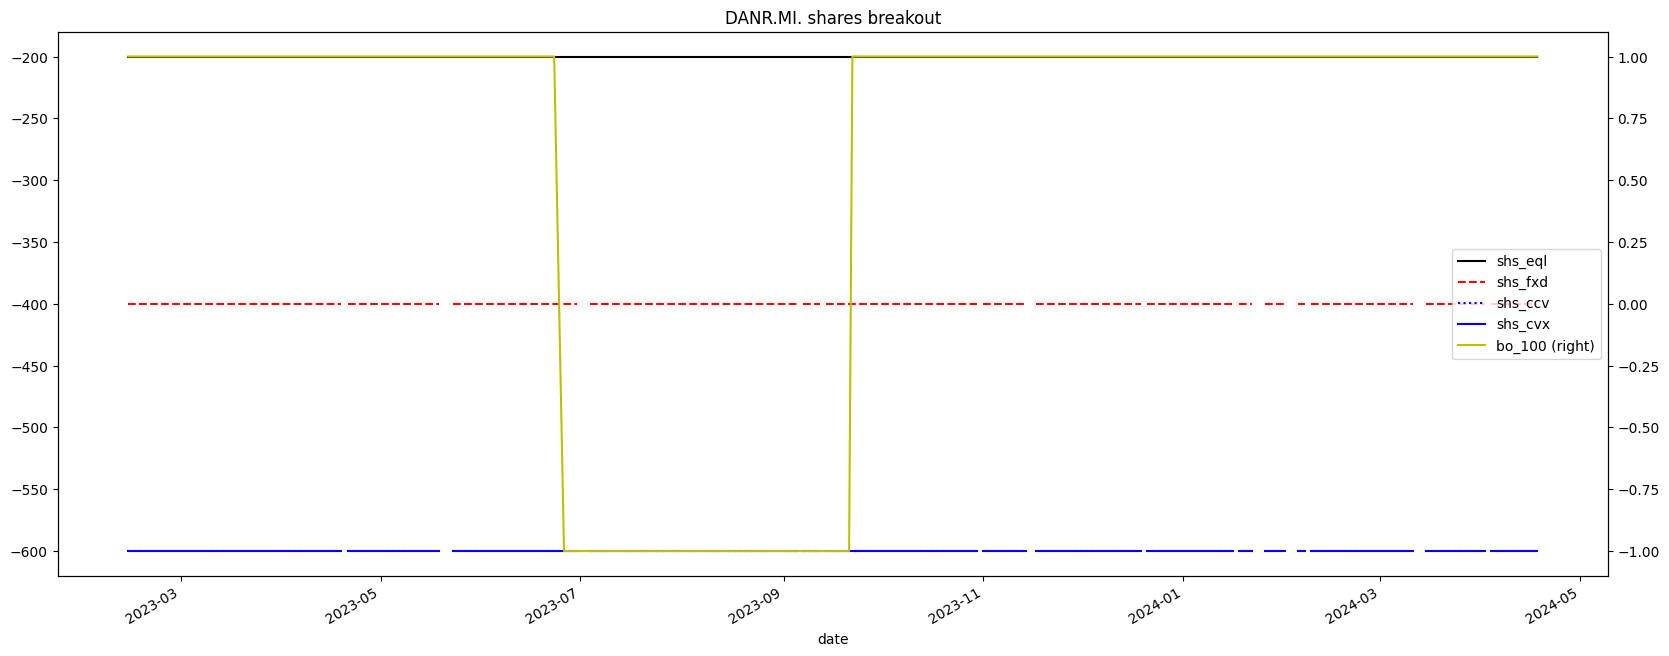

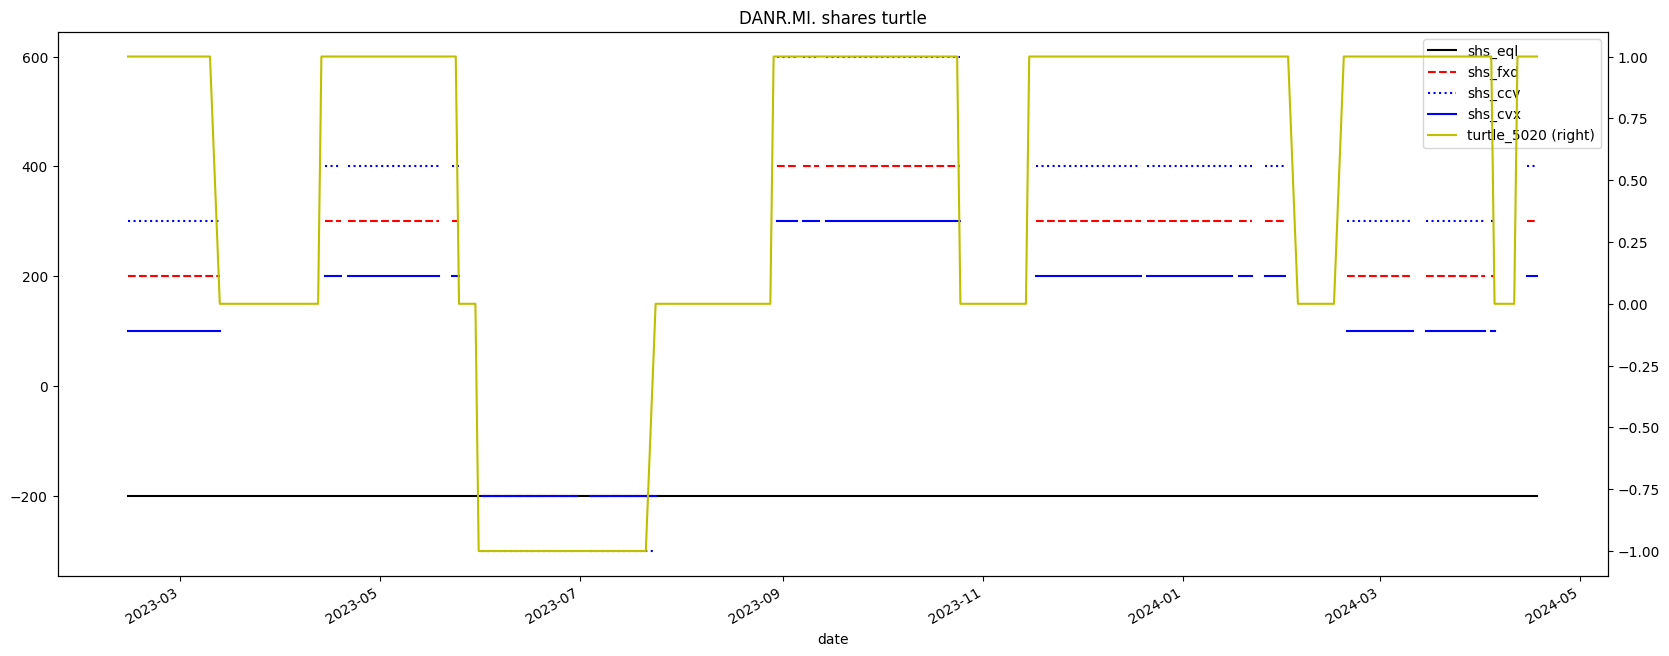

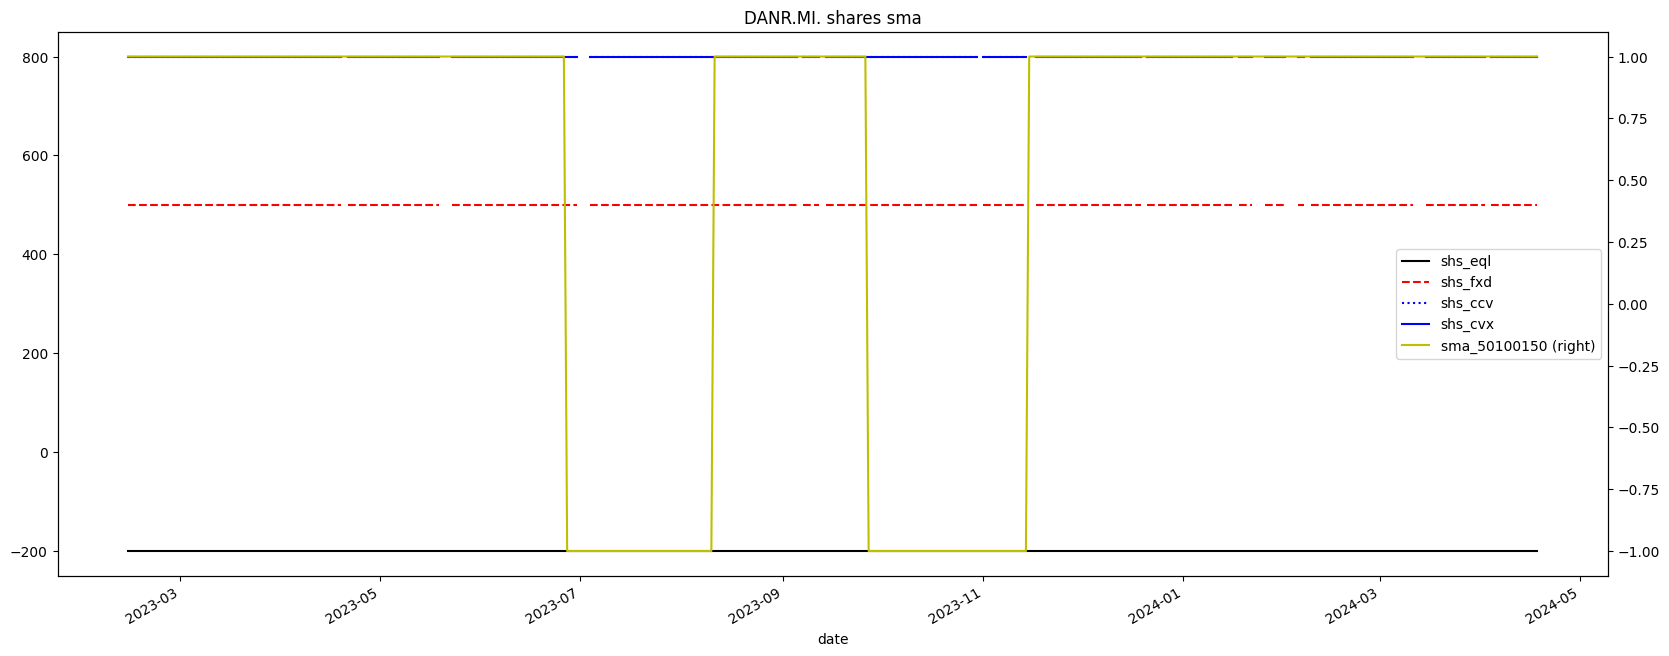

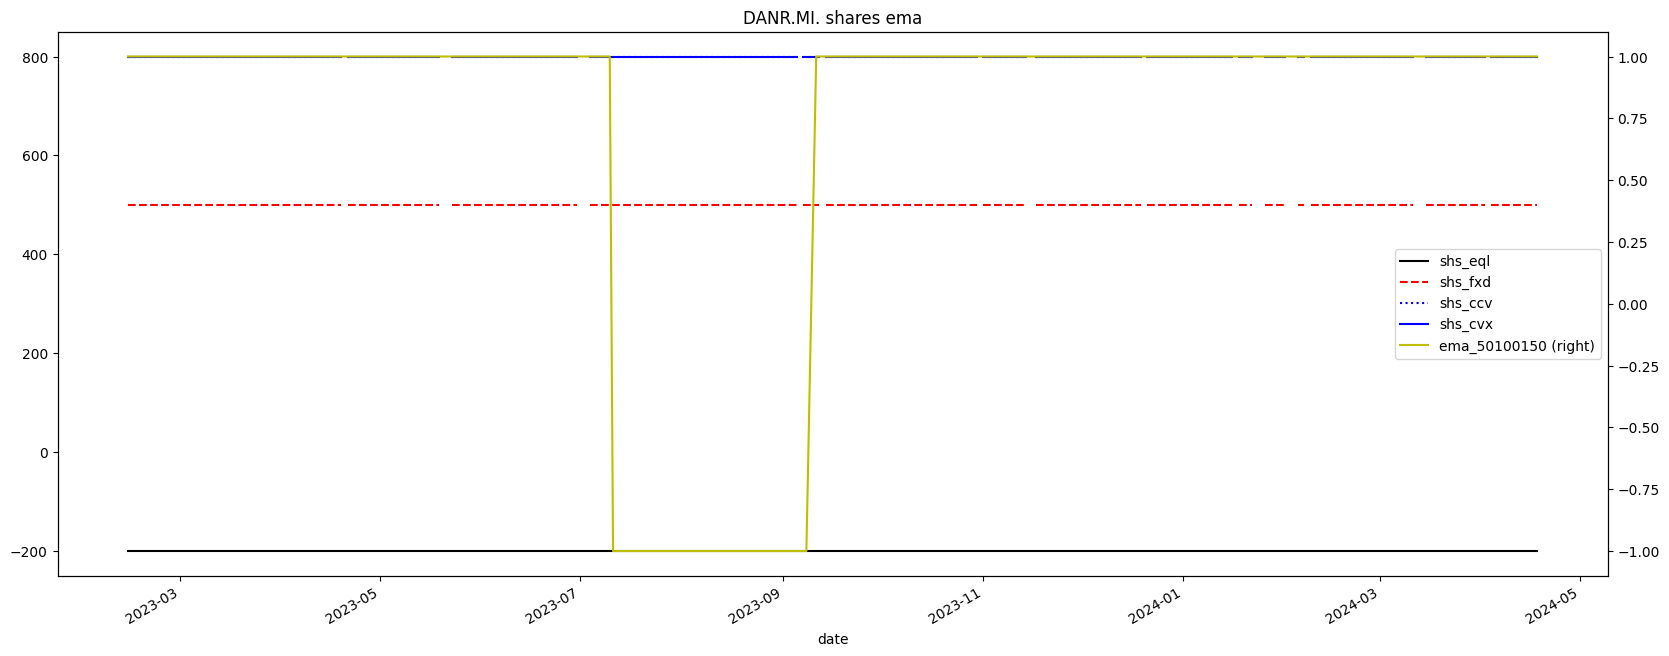

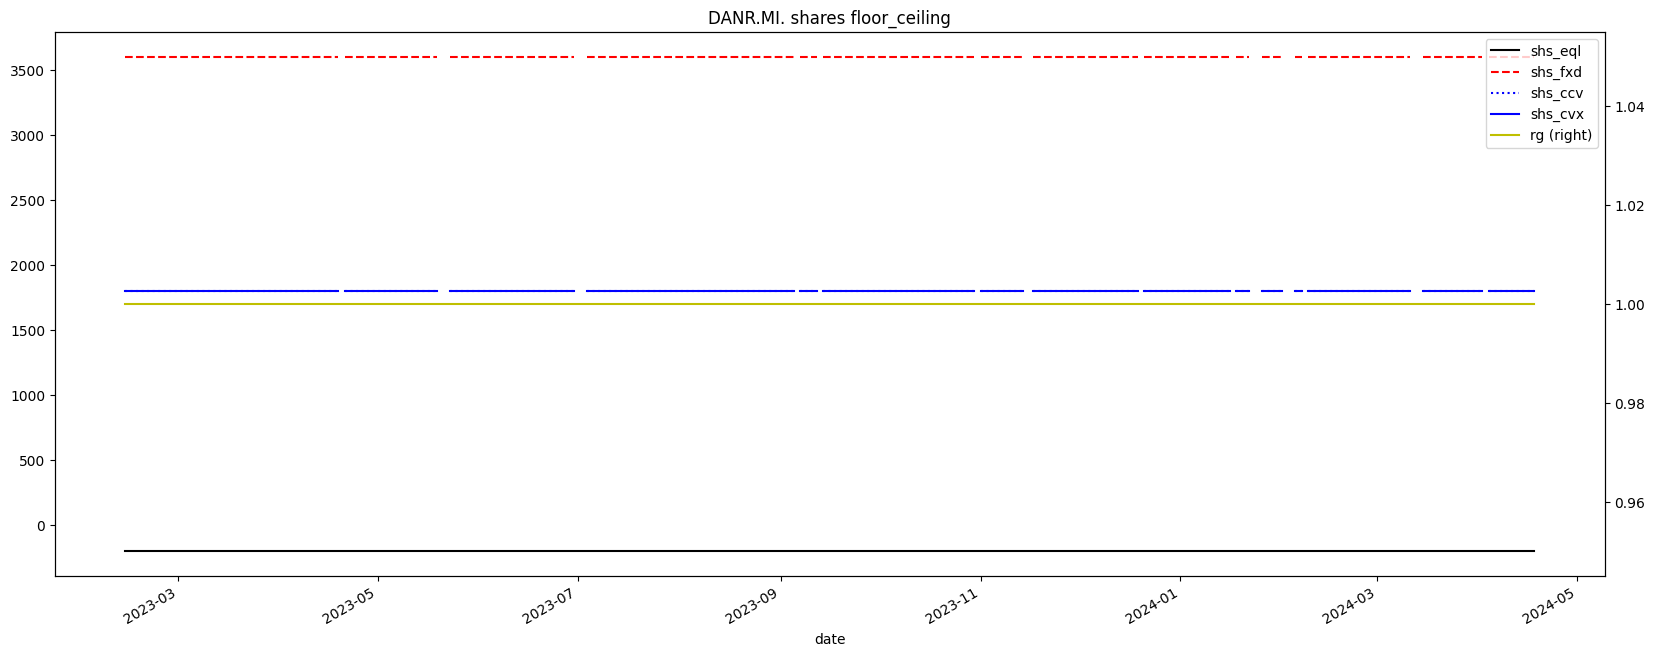

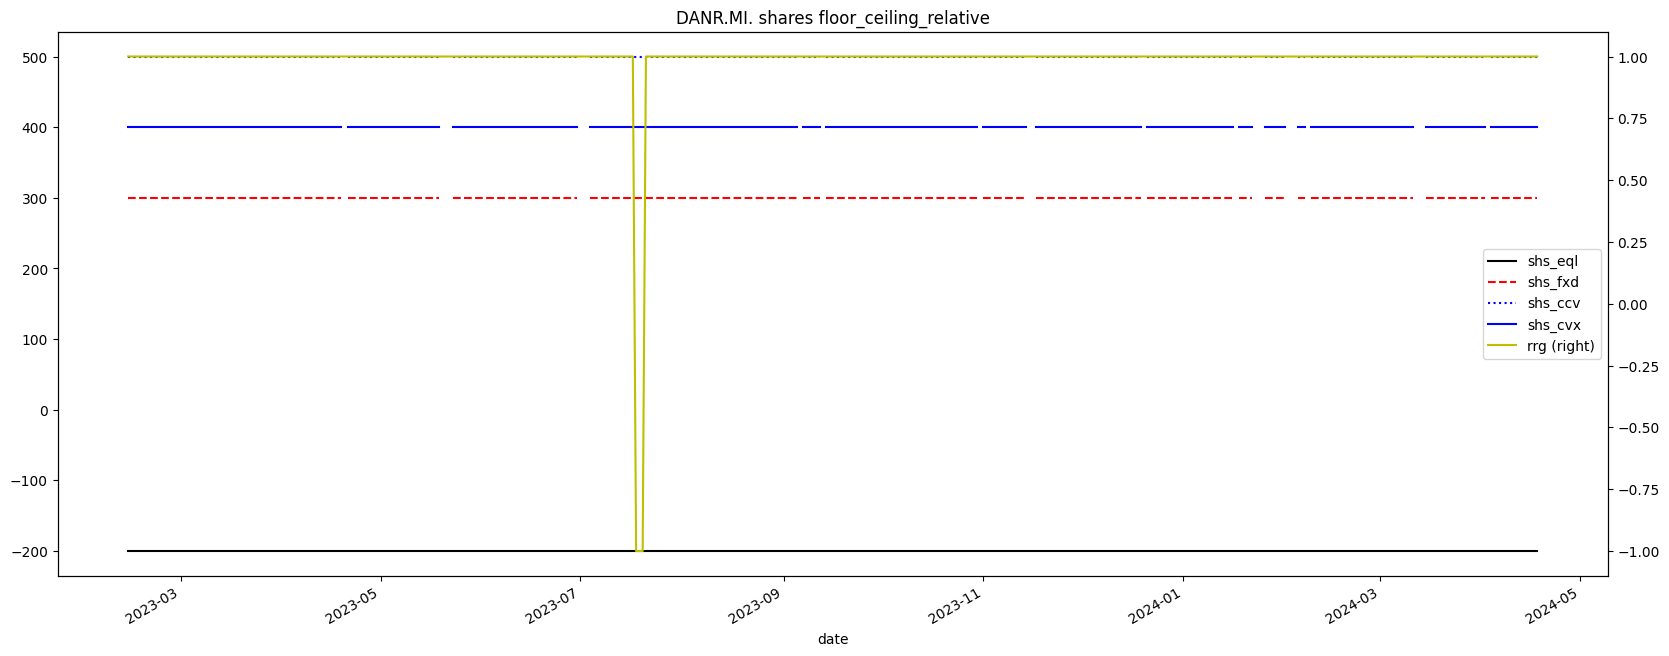

In [25]:
def plot_shares_signal(df, ticker, signal, m):
    df[['shs_eql','shs_fxd','shs_ccv','shs_cvx', signal]].plot(secondary_y=[signal],figsize=(20,8),style= ['k','r--','b:','b', 'y'],
                                                         title= str(ticker)+' shares ' + str(m))
    plt.show()
    
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_shares_signal(output_signals[i].tail(300), ticker, signal[i], method[i])
